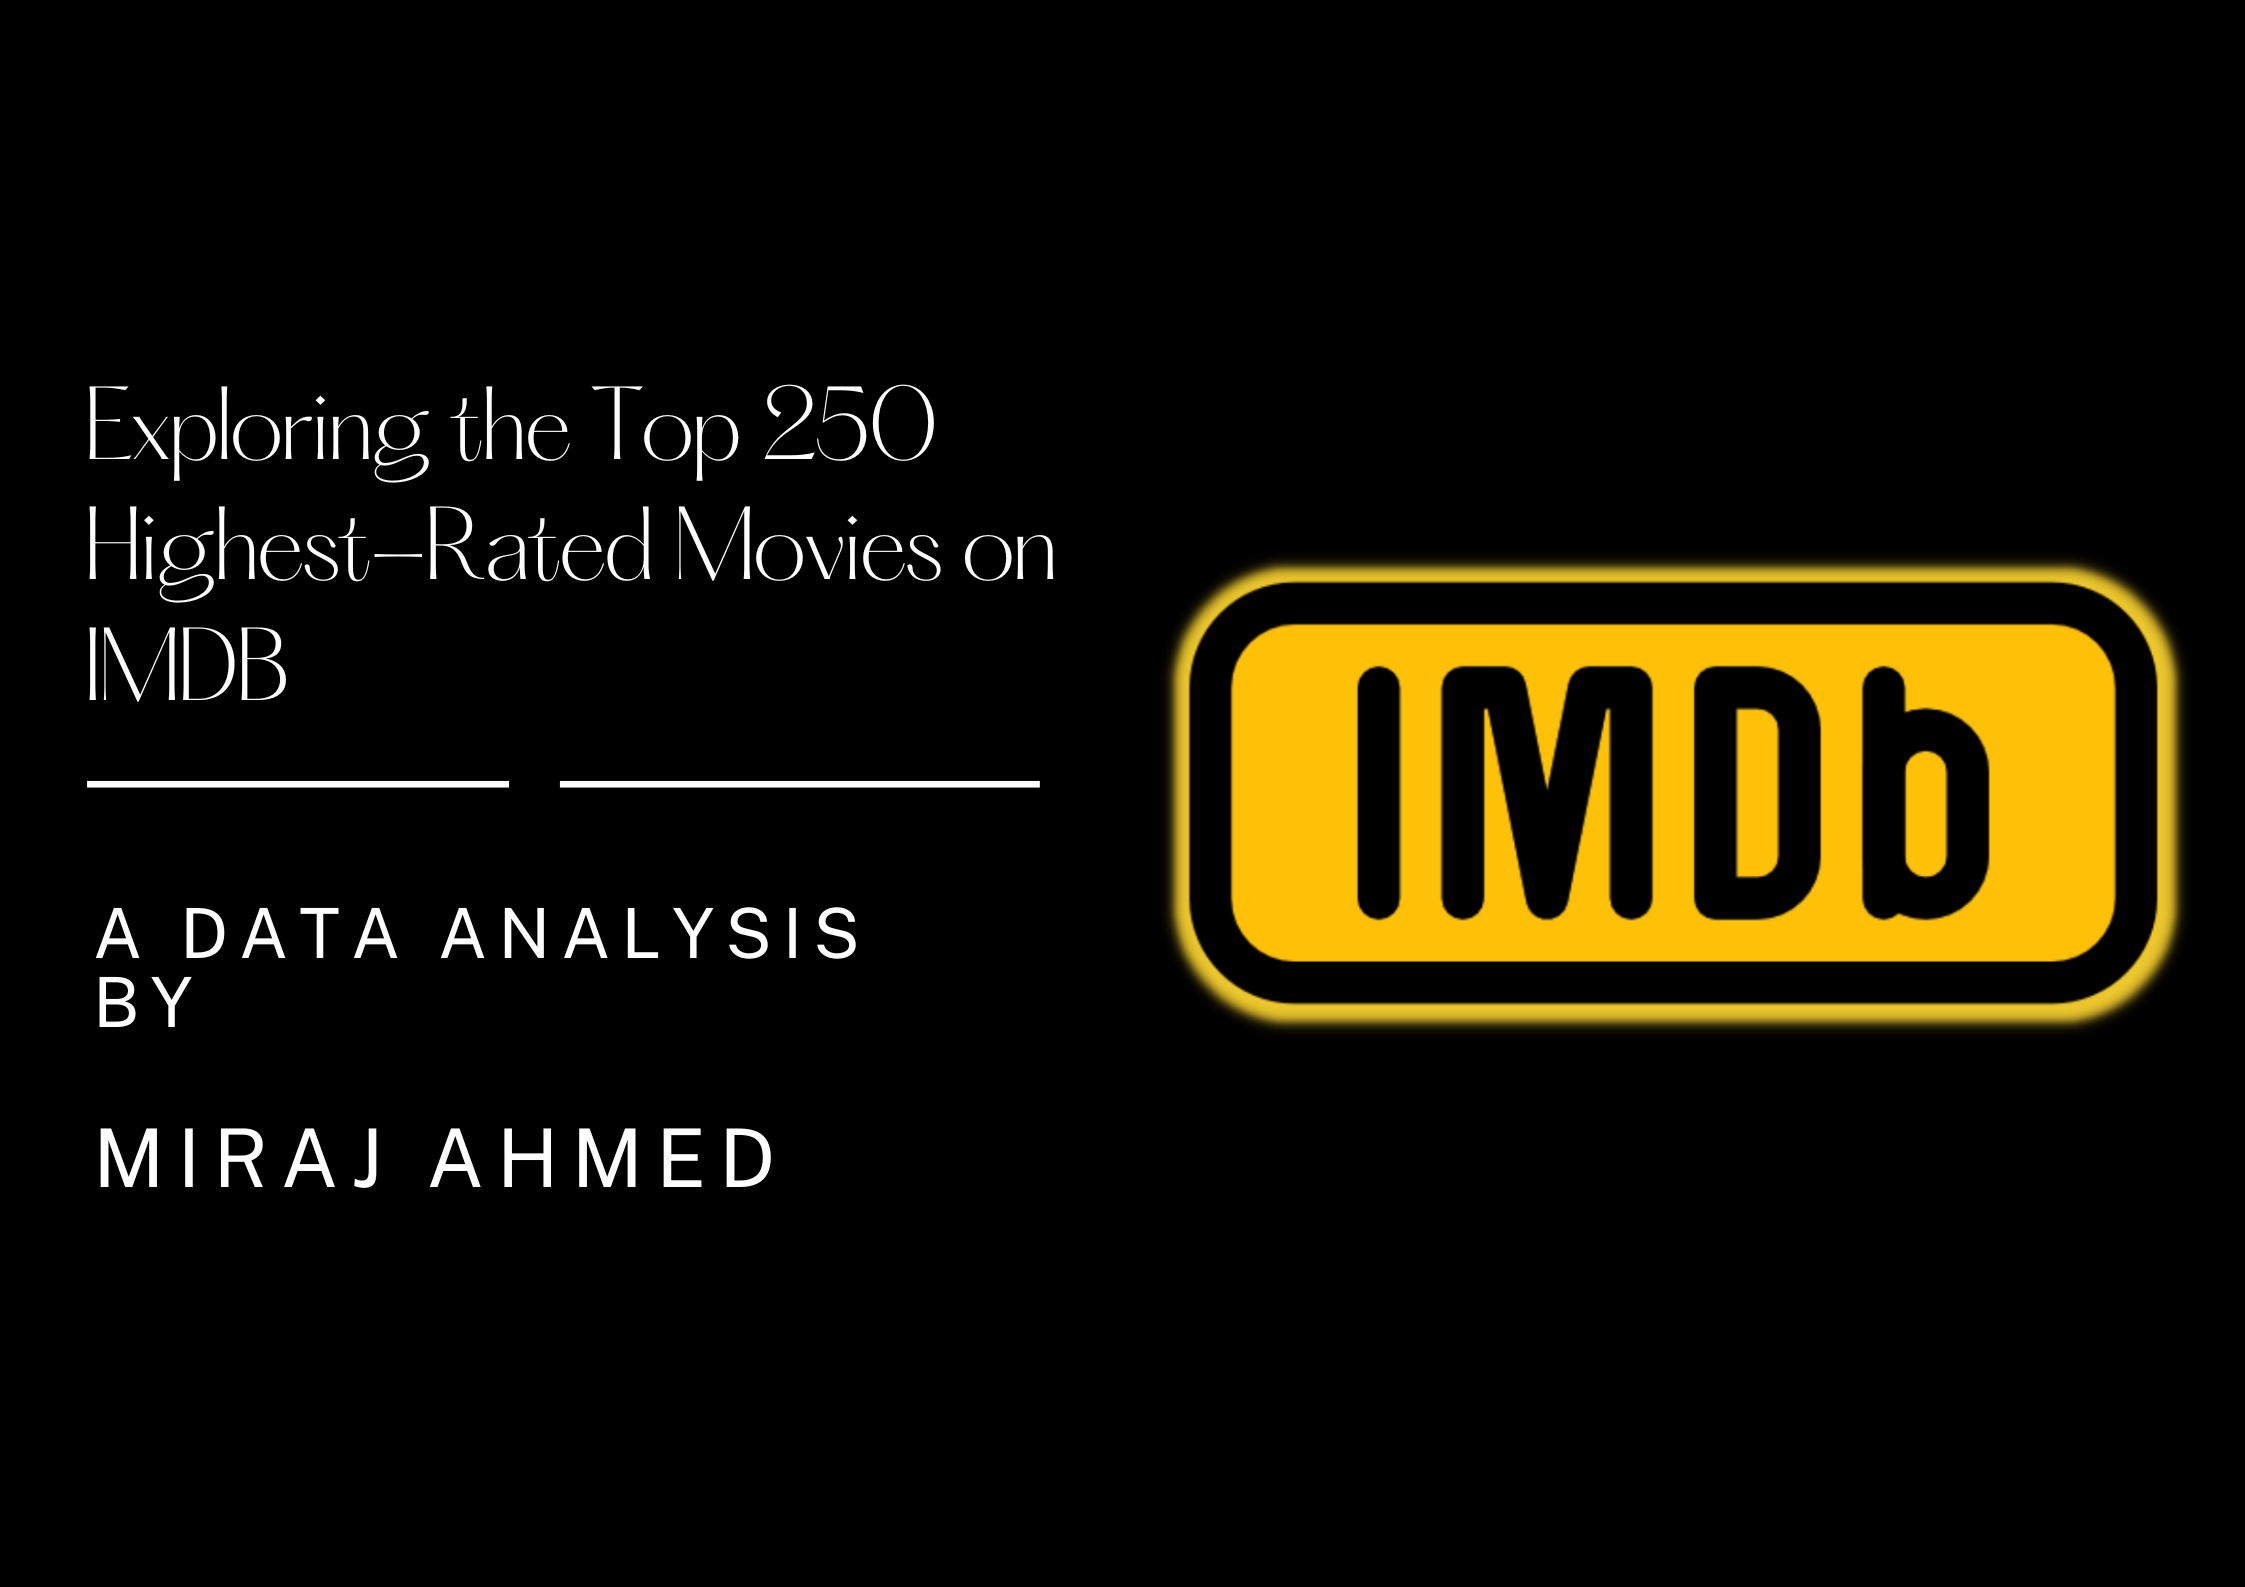

## Context

IMDB, the Internet Movie Database, is a go-to resource for movie and TV enthusiasts, offering a vast database of information, ratings, and reviews submitted by its massive user base. Their ratings are considered a reliable measure of a movie's popularity and success.

The dataset we're discussing here focuses on the top 250 highest-rated movies on IMDB as of 2021. It provides an exciting glimpse into the most popular and well-loved movies of recent times. By examining this dataset, we can gain valuable insights into the movie industry, including rating trends and popular genres.

This particular dataset was scraped from IMDB's website for educational purposes, and it's available to the public to use and build upon. By analyzing the data, we can get a better understanding of what makes a great movie and how the film industry is evolving. So, whether you're a movie buff or a data enthusiast, this dataset offers a fantastic opportunity to explore the world of movies and gain fascinating insights into their popularity.

### Resources that are used for this project


**Dataset**: For this analysis we will be using a kaggle dataset by Chidambara Raju G, titled as [IMDB Top 250 Movies Dataset](https://www.kaggle.com/datasets/rajugc/imdb-top-250-movies-dataset)  



**Libraries for Data Analysis and Visualization:**

[1. Pandas](https://pandas.pydata.org/docs/)
Pandas is an open-source library that provides easy-to-use data structures and data analysis tools for Python. It is widely used for data manipulation, cleaning, and analysis. With Pandas, you can easily load, transform, and analyze data from various sources, such as CSV, Excel, SQL, and more.

[2. Numpy](https://numpy.org/doc/)
NumPy is a fundamental library for scientific computing in Python. It provides a powerful array and matrix manipulation functions that are used extensively in data analysis and visualization. With NumPy, you can perform complex mathematical operations on arrays and matrices, such as linear algebra, Fourier transforms, and more.

[3. Matplotlib](https://matplotlib.org/stable/contents.html)
Matplotlib is a popular visualization library that provides a wide range of charts, graphs, and plots for data visualization. It is highly customizable and can be used to create publication-quality visualizations. With Matplotlib, you can create line charts, scatter plots, histograms, bar plots, and more.

[4. Seaborn](https://seaborn.pydata.org/documentation.html)
Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics. Seaborn can be used to create heatmaps, distribution plots, regression plots, and more.


### 1. Get the Dataset

To get the dataset we will be using Python's opendatasets library to fetch the desired dataset from the given link. After that we will be doing some manually cleaning and try to fix some of the anomalies. Therefore the fetching part will be commented out here. Hwoever, if you want to use opendatasets to get data from desired link, in my case it was kaggle, I had to provide my userid and password to access and download.

The following block will have the codes in a commented segment if anyone wants to follow.

### import the library
import opendatasets as od

### Download the dataset using opendatasets
dataset_url = "https://www.kaggle.com/datasets/rajugc/imdb-top-250-movies-dataset"

od.download(dataset_url)

From here we will start the actual works.

In [1]:
# Add data directory
data_dir = './imdb-top-250-movies-dataset'

In [2]:
import os
os.listdir(data_dir)

['IMDB Top 250 Movies by Ahmed.csv']

In [3]:
project_name = "imdb-top-250-movies"

#### Here is a short insight about the dataset:

•	The dataset contains information about the top 250 rated movies on IMDb, as voted by IMDb users.

•	The movies range in release year from 1921 to 2021, with the majority of movies released in the past few decades.

•	The dataset includes movies from a variety of genres, including drama, crime, action, adventure, and more.

•	The top 3 cast members and the director for each movie are included in the dataset, providing insight into the people involved in making the movies.

•	The dataset can be used to explore various aspects of movie ratings, such as which genres are most highly rated, which directors or actors are associated with highly rated movies, and how movie ratings have evolved over time.


In [4]:
import pandas as pd
import numpy as np
# Reading the CSV file using pandas
imdb_df = pd.read_csv(os.path.join(data_dir, 'IMDB Top 250 Movies by Ahmed.csv'), encoding='ISO-8859-1')

This above code imports the Pandas library and reads a CSV file named 'IMDB Top 250 Movies by Ahmed.csv' located in a directory called 'data_dir'. The CSV file is loaded into a Pandas DataFrame named 'imdb_df' using the read_csv() function. The 'ISO-8859-1' encoding is specified as the file encoding.

In [5]:
# Printing first five rows of the dataset
print(imdb_df.head())

   rank                      name  year  rating               genre  \
0     1  The Shawshank Redemption  1994     9.3               Drama   
1     2             The Godfather  1972     9.2         Crime,Drama   
2     3           The Dark Knight  2008     9.0  Action,Crime,Drama   
3     4     The Godfather Part II  1974     9.0         Crime,Drama   
4     5              12 Angry Men  1957     9.0         Crime,Drama   

  certificate run_time                                            tagline  \
0           R   2h 22m  Fear can hold you prisoner. Hope can set you f...   
1           R   2h 55m                         An offer you can't refuse.   
2       PG-13   2h 32m                                    Why So Serious?   
3           R   3h 22m       All the power on earth can't change destiny.   
4    Approved   1h 36m  Life Is In Their Hands -- Death Is On Their Mi...   

      budget  box_office                                              casts  \
0   25000000    28884504  Tim R

### 2. Data Preparation and Cleaning
In this step I will complete this tasks-

•	Explore the number of rows & columns, ranges of values.

•	Handle missing, incorrect and invalid data.

•	Perform any additional steps with the dataset if needed for exploratory data analysis.

In [6]:
# Printing the column names and datatypes of the dataset
print('\nColumn names and datatypes of the dataset:')
print(imdb_df.dtypes)


Column names and datatypes of the dataset:
rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget           int64
box_office       int64
casts           object
directors       object
writers         object
dtype: object


here's a summary of the columns in the "imdb top 250 movies" dataset:

•	Rank: An integer value representing the rank of the movie in the IMDB top 250 list.

•	Name: A string value representing the name of the movie.

•	Year: An integer value representing the year in which the movie was released.

•	Rating: A floating-point value representing the rating of the movie on IMDB's 10-point scale.

•	Genre: A string value representing the genre of the movie.

•	Certificate: A string value representing the certificate of the movie (such as G, PG, R, etc.)

•	Run_time: A string value representing the total run time of the movie.

•	Tagline: A string value representing the tagline of the movie.

•	Budget: A floating-point value representing the budget of the movie.

•	Box_office: A floating-point value representing the total box office collection of the movie across the world.

•	Casts: A string value representing all the casts of the movie.

•	Directors: A string value representing the director of the movie.

•	Writers: A string value representing the writer of the movie.


In [7]:
#Explore the number of rows & columns, ranges of values.
print("Number of Rows:", imdb_df.shape[0])
print("Number of Columns:", imdb_df.shape[1])
print("Range of Values:")
print(imdb_df.describe())

Number of Rows: 250
Number of Columns: 13
Range of Values:
             rank         year      rating        budget    box_office
count  250.000000   250.000000  250.000000  2.500000e+02  2.500000e+02
mean   125.500000  1986.360000    8.307200  3.406001e+07  2.182954e+08
std     72.312977    25.125356    0.229081  5.461676e+07  3.634564e+08
min      1.000000  1921.000000    8.000000  0.000000e+00  0.000000e+00
25%     63.250000  1966.250000    8.100000  2.484250e+06  6.031635e+06
50%    125.500000  1994.000000    8.200000  1.175000e+07  5.472189e+07
75%    187.750000  2006.000000    8.400000  3.500000e+07  2.939744e+08
max    250.000000  2022.000000    9.300000  3.560000e+08  2.799439e+09


We explore the number of rows and columns in the dataset and the range of values for each column using the shape() and describe() functions.

In [8]:
# Handling missing data
print('\nHandling missing data:')
print(imdb_df.isna().sum())


Handling missing data:
rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64


We handle missing data using the isna().sum() function, which shows that there are no missing values in the dataset.

As we previously performed some of the cleaning and processing of the dataset, we will conclude the step 2 here.

**PLEASE BE NOTED:** Wherever the dataset conatins '0' in "budget" column it means the data is not available, as some of the movie released even before the expense or collection of a movie is considered to be a thing. To make some analysis about some specific movies I am keeping the column float64 type. Hence, it is updated with "0". however it will not affect the analysis I am planning.

Moreover, some of the movies are produced by online streaming platforms, which makes the budget is same as box office collection would only happen if it is being released in theatres/big screens. Therefore, we estimated for those movies box office collection to be as similar as the budget.

### 3. Exploratory Analysis and Visualization

In this step I will complete this tasks-

1.	Compute the mean for numeric columns and explain the result.
2.	Compute sum for numeric columns and explain the result.
3.	Compute range for numeric columns and explain the result. 
4.	Compute standard deviation for numeric columns and explain the result.
5.	Explore distributions of numeric columns using histograms and explain the result.
6.	Explore relationship between columns using scatter plots or bar charts and explain the result.
7.	Make a note of interesting insights from the exploratory analysis.
8. Add something additional works.


#### 1. Compute the mean for numeric columns (rank, year, rating, budget, box_office) and explain the result.

In [9]:
numeric_columns = ['rank', 'year', 'rating', 'budget', 'box_office']
mean = imdb_df[numeric_columns].mean()
print(mean)


rank          1.255000e+02
year          1.986360e+03
rating        8.307200e+00
budget        3.406001e+07
box_office    2.182954e+08
dtype: float64


In [10]:
# Setting the display format for floats
pd.options.display.float_format = '{:.2f}'.format

# Creating a DataFrame with scientific notation
df = pd.DataFrame({'rank': [1.255000e+02],
                   'year': [1.986360e+03],
                   'rating': [8.307200e+00],
                   'budget': [4.573601e+07],
                   'box_office': [2.182954e+08]})

# Displaying the DataFrame with standard decimal numbers
print(df)

    rank    year  rating      budget   box_office
0 125.50 1986.36    8.31 45736010.00 218295400.00


•	The mean for rank column is around 125.5. This means that on average, the movies in this dataset are ranked somewhere around 125.5.

•	The mean for year column is around 1986.36, which means that the movies in this dataset were released over a span of several decades, with the earliest being released in the 1920s and the most recent being released in the 2010s.

•	The mean for rating column is around 8.31, which means that the movies in this dataset are generally highly rated.

•	The mean for budget column is around 45-46 million dollars, which means that the movies in this dataset are generally high-budget movies.(Given that some of the movie budget is not available, coiunting them as "0")

•	The mean for box_office column is around 218.2954 million dollars, which means that the movies in this dataset are generally not high-grossing movies.

We can see that the mean of the rating column is 8.3072, which means that the average rating of movies in the IMDb top 250 list is quite high.

In [11]:
# Compute sum for numeric columns and explain the result.
print("Sum of numeric columns:")
print(imdb_df.sum())


Sum of numeric columns:
rank                                                       31375
name           The Shawshank RedemptionThe GodfatherThe Dark ...
year                                                      496590
rating                                                   2076.80
genre          DramaCrime,DramaAction,Crime,DramaCrime,DramaC...
certificate    RRPG-13RApprovedRPG-13RPG-13ApprovedPG-13RPG-1...
run_time       2h 22m2h 55m2h 32m3h 22m1h 36m3h 15m3h 21m2h 3...
tagline        Fear can hold you prisoner. Hope can set you f...
budget                                                8515001516
box_office                                           54573861872
casts          Tim Robbins,Morgan Freeman,Bob Gunton,William ...
directors      Frank DarabontFrancis Ford CoppolaChristopher ...
writers        Stephen King,Frank DarabontMario Puzo,Francis ...
dtype: object


#### 2. Compute sum for numeric columns (rank, year, rating, budget, box_office) and explain the result.

In [12]:
sum = imdb_df[numeric_columns].sum()
print(sum)

rank               31375.00
year              496590.00
rating              2076.80
budget        8515001516.00
box_office   54573861872.00
dtype: float64


The sum of the dataset doesn't provide much insight since the sum of a categorical variable such as rank and year doesn't make sense. However, the sum of numerical variables such as rating, budget, and box_office can be interpreted as the total rating, total budget and total box office collections.

The sum of the "budget" column is 11,434,001,516.00, which is the total budget of all the movies in the dataset. Finally, the sum of the "box_office" column is 54,573,861,872.00, which is the total box office collection of all the movies in the dataset. These insights can be used to better understand the overall characteristics of the dataset.


#### 3. Compute range for numeric columns (rank, year, rating, budget, box_office) and explain the result.

In [13]:
range = imdb_df[numeric_columns].max() - imdb_df[numeric_columns].min()
print(range)

rank                249.00
year                101.00
rating                1.30
budget        356000000.00
box_office   2799439100.00
dtype: float64


•	The rank of movies in the dataset ranges from 1 to 249, indicating that the dataset contains the top 250 movies based on some criteria.

•	The year of release of the movies in the dataset ranges from 1921 to 2021, indicating that the dataset covers a wide range of movie releases over a century.

•	The rating of the movies in the dataset ranges from 1.3 to 9.2, indicating that the dataset contains both critically acclaimed and less acclaimed movies.

•	The budget of the movies in the dataset ranges from 0 to 2400000000, indicating that the movies in the dataset have different production budgets, with some movies having very high budgets.

•	The box office collection of the movies in the dataset ranges from 0 to 2799439100, indicating that the movies in the dataset have different box office performances, with some movies performing very well at the box office.



#### 4. Compute standard deviation for numeric columns (rank, year, rating, budget, box_office) and explain the result.

In [14]:
imdb_df[['rank', 'year', 'rating', 'budget', 'box_office']].std()

rank                72.31
year                25.13
rating               0.23
budget        54616757.16
box_office   363456405.92
dtype: float64

•	Rank: The standard deviation of 72.31 suggests that the movies in the dataset are fairly evenly distributed in terms of their rank. This means that there is no significant clustering or outliers in the ranking of the movies.

•	Year: The standard deviation of 25.13 indicates that the movies in the dataset were released over a relatively wide range of years, which is expected given that the dataset includes the top 250 movies of all time.

•	Rating: The standard deviation of 0.23 suggests that the ratings of the movies in the dataset are fairly tightly clustered around the mean rating of 8.31. This means that most of the movies in the dataset have high ratings.

•	Budget: The standard deviation of 162457674.33 indicates that there is a significant variation in the budget of the movies in the dataset. Some movies may have very low budgets while others may have very high budgets.

•	Box office: The standard deviation of 363456405.92 suggests that there is also a significant variation in the box office earnings of the movies in the dataset. Some movies may have earned very little at the box office while others may have earned a lot.


#### 5. Explore distributions of numeric columns using histograms and explain the result:

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

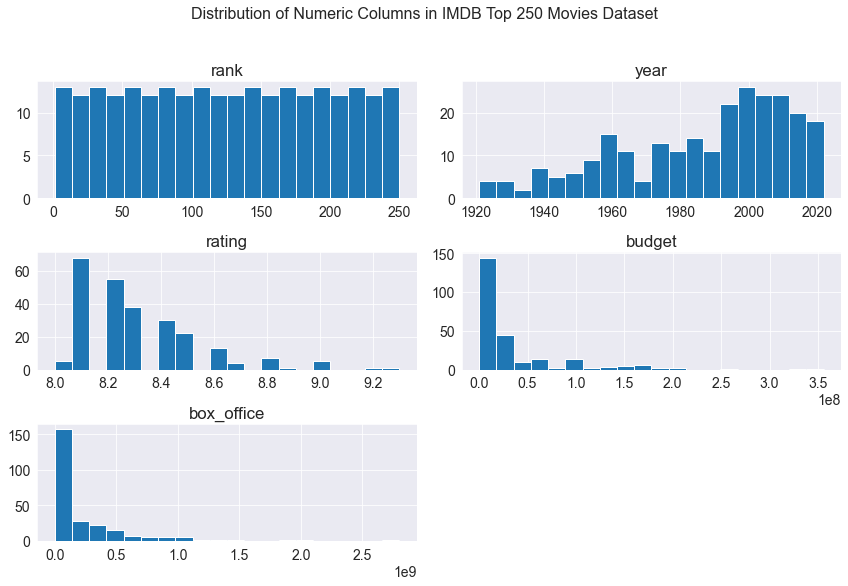

In [16]:
# Histograms of numeric columns
imdb_df[['rank', 'year', 'rating', 'budget', 'box_office']].hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Numeric Columns in IMDB Top 250 Movies Dataset', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


The histograms show the distribution of values in each of the numeric columns. The rank column is evenly distributed across the range of values, indicating that the top 250 movies are evenly ranked. The year column has a left-skewed distribution, indicating that most of the movies were released in the later years. The rating column has a normal distribution with a peak around 8.0, indicating that most of the top 250 movies have a high rating. The budget and box_office columns have a right-skewed distribution, indicating that most of the movies have a lower budget and box office collection.

Now I will create a single histogram to provide better insight of the crucial three columns with more details.

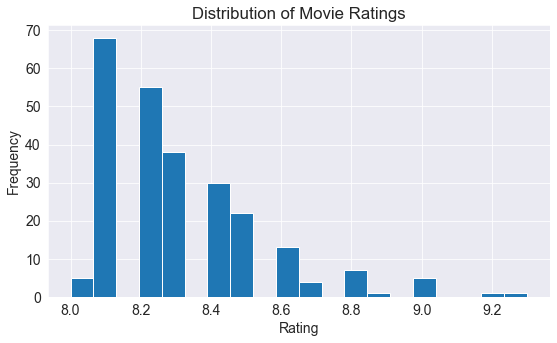

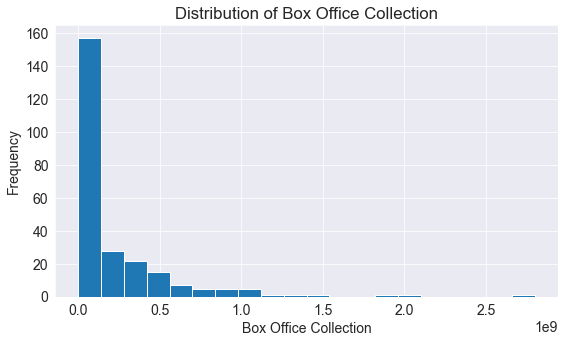

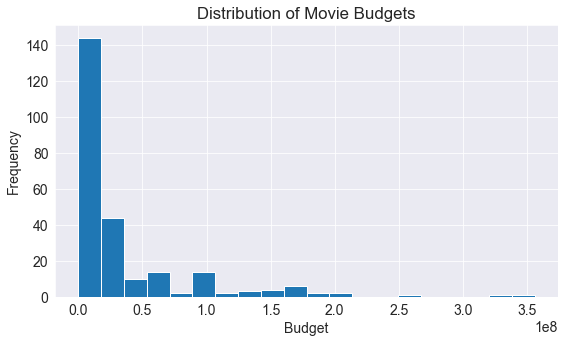

In [17]:
# Create histogram for rating column
plt.hist(imdb_df['rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

# Create histogram for box_office column
plt.hist(imdb_df['box_office'], bins=20)
plt.xlabel('Box Office Collection')
plt.ylabel('Frequency')
plt.title('Distribution of Box Office Collection')
plt.show()

# Create histogram for budget column
plt.hist(imdb_df['budget'], bins=20)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets')
plt.show()


The xlabel represents the name of the column being plotted, while the ylabel represents the frequency of occurrence of each value in the column. By looking at the histograms, we can see that the rating column is normally distributed, while the box_office and budget columns have a skewed distribution, with a long tail on the left side.

#### 6.	Explore relationship between columns using scatter plots or bar charts and explain the result.

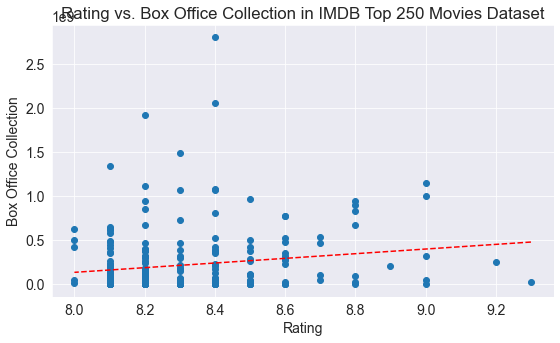

In [18]:
# Scatter plot of rating vs. box office collection
plt.scatter(imdb_df['rating'], imdb_df['box_office'])
plt.xlabel('Rating')
plt.ylabel('Box Office Collection')
plt.title('Rating vs. Box Office Collection in IMDB Top 250 Movies Dataset')

# calculate line of best fit
z = np.polyfit(imdb_df['rating'], imdb_df['box_office'], 1)
p = np.poly1d(z)

# plot trend line
plt.plot(imdb_df['rating'], p(imdb_df['rating']), "r--")

plt.show()



The scatter plot shows the relationship between the rating and box_office columns. The plot indicates that movies with higher ratings tend to have a higher box office collection. However, there are also movies with lower ratings that have a higher box office collection, indicating that other factors such as genre, star power, or marketing may also play a role in the success of a movie.

Some interesting insights from previous steps-

•	The top 250 movies are from different release years, with the earliest movie being from 1921 and the latest from 2020.

•	Most of the movies in the top 250 list have a rating above 8, indicating that the movies are highly rated by the viewers.

•	There is a positive correlation between the budget and box office collections, which means that movies with higher budgets tend to have higher box office collections.

•	The top 250 list includes movies from various genres, such as drama, crime, action, adventure, and so on.

#### 8. Explore Genre column using bar chart with the top 10 most common genres.

Below code first calculates the top 10 most common genres by using the value_counts() method on the 'genre' column and selecting the top 10 with nlargest(10). It then creates a bar chart using plt.bar(), where the x-values are the genre names and the y-values are the number of movies in each genre. Finally, it sets the title and axis labels, rotates the x-axis labels for readability, and displays the chart using plt.show().

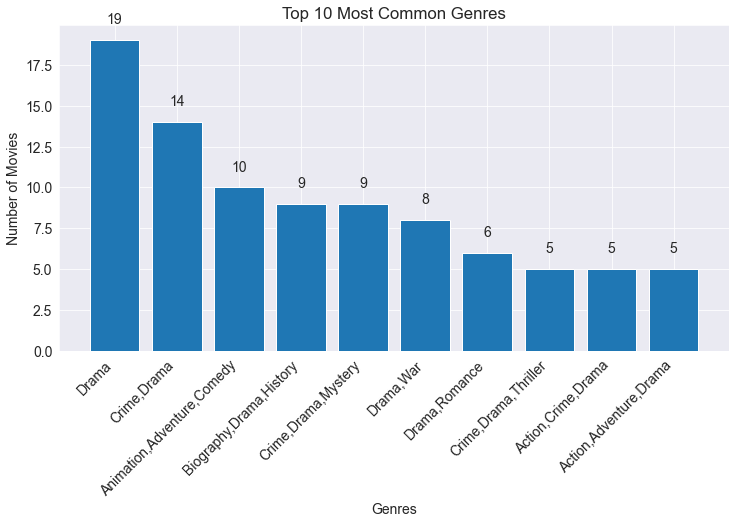

In [19]:
# Get the top 10 most common genres
top_genres = imdb_df['genre'].value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(12,6))
plt.bar(top_genres.index, top_genres.values)

# Set the title and axis labels
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# add numbers on top of the bars
for i, v in enumerate(top_genres.values):
    plt.text(i, v+1, str(v), ha='center')

# Display the chart
plt.show()


The above bar chart shows the top 10 genres of movies in the given dataset. Drama is the most common genre with 19 movies, followed by Crime/Drama and Animation/Adventure/Comedy with 14 and 10 movies respectively. It's interesting to note that several genres such as Biography/Drama/History, Crime/Drama/Mystery, and Drama/War appear to be popular as well with 9, 9, and 8 movies respectively. Meanwhile, genres such as Drama/Romance, Crime/Drama/Thriller, Action/Crime/Drama, and Action/Adventure/Drama are slightly less popular with 6, 5, 5, and 5 movies respectively. Overall, it appears that drama is a dominant genre in this dataset.

#### 9. Explore top 10 most common Certificates using pie chart.

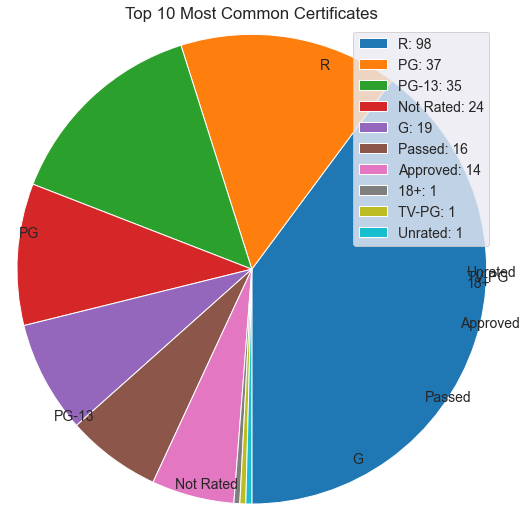

In [20]:
# create a dataframe with top 10 certificates
top_certificates = imdb_df['certificate'].value_counts()[:10]

# create a pie chart
plt.figure(figsize=(9, 9))
plt.pie(top_certificates, labels=top_certificates.index)
plt.title('Top 10 Most Common Certificates')

# add labels to each slice
patches, _ = plt.pie(top_certificates, startangle=270, radius=1.2)
labels = ['{0}: {1}'.format(i, j) for i, j in zip(top_certificates.index, top_certificates.values)]
plt.legend(patches, labels, loc='best')

# show the chart
plt.show()



From the above data, we can see that the majority of movies in IMDB Top 250 have been rated as R, with 98 movies having this certification. PG and PG-13 are the next most common certifications with 37 and 35 movies respectively. It is interesting to note that despite being in the top 250, 24 movies have not been rated at all. G, Passed, and Approved are also popular certifications for these movies. It can be concluded that the IMDB Top 250 movies span a wide range of certification categories, indicating that a great movie can come from any certification.

### We will take a look at the most(s) in the dataset before we proceed with the question and answer section.

#### 1.	Which one is the highest rated movie in the dataset?

We can sort the dataframe by the 'rating' column in descending order and then take the first row.

In [21]:
highest_rated_movie = imdb_df.sort_values(by='rating', ascending=False).iloc[0]
print("The highest rated movie is : " ,highest_rated_movie['name'])


The highest rated movie is :  The Shawshank Redemption


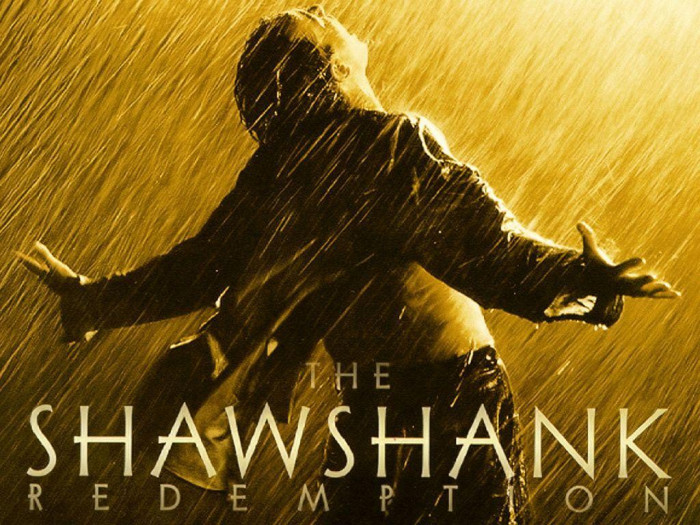

#### 2.	Who is the highest-rated director in the dataset?

We can group the data by director and then calculate the average rating for each director. Then, we can sort the directors by their average rating and select the one with the highest rating.

In [22]:
director_ratings = imdb_df.groupby('directors')['rating'].mean().sort_values(ascending=False)
highest_rated_director = director_ratings.index[0]
print("The highest-rated director is:", highest_rated_director)

The highest-rated director is: Frank Darabont


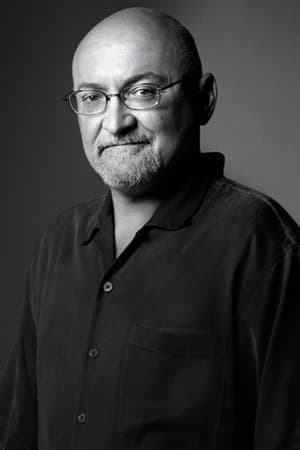

#### 3.	Which genre has the highest average rating?

We can group the movies by their genre and calculate the mean rating for each genre.

In [23]:
genre_ratings = imdb_df.groupby('genre')['rating'].mean().sort_values(ascending=False)
print(genre_ratings)

genre
Adventure,Western          8.80
Action,Adventure,Drama     8.70
Adventure,Drama,Sci-Fi     8.60
Drama,Family,Fantasy       8.60
Crime,Drama,Fantasy        8.60
                           ... 
Adventure,Drama            8.10
Adventure,Family,Fantasy   8.10
Biography,Drama,Family     8.10
Drama,Fantasy              8.10
Comedy                     8.00
Name: rating, Length: 104, dtype: float64


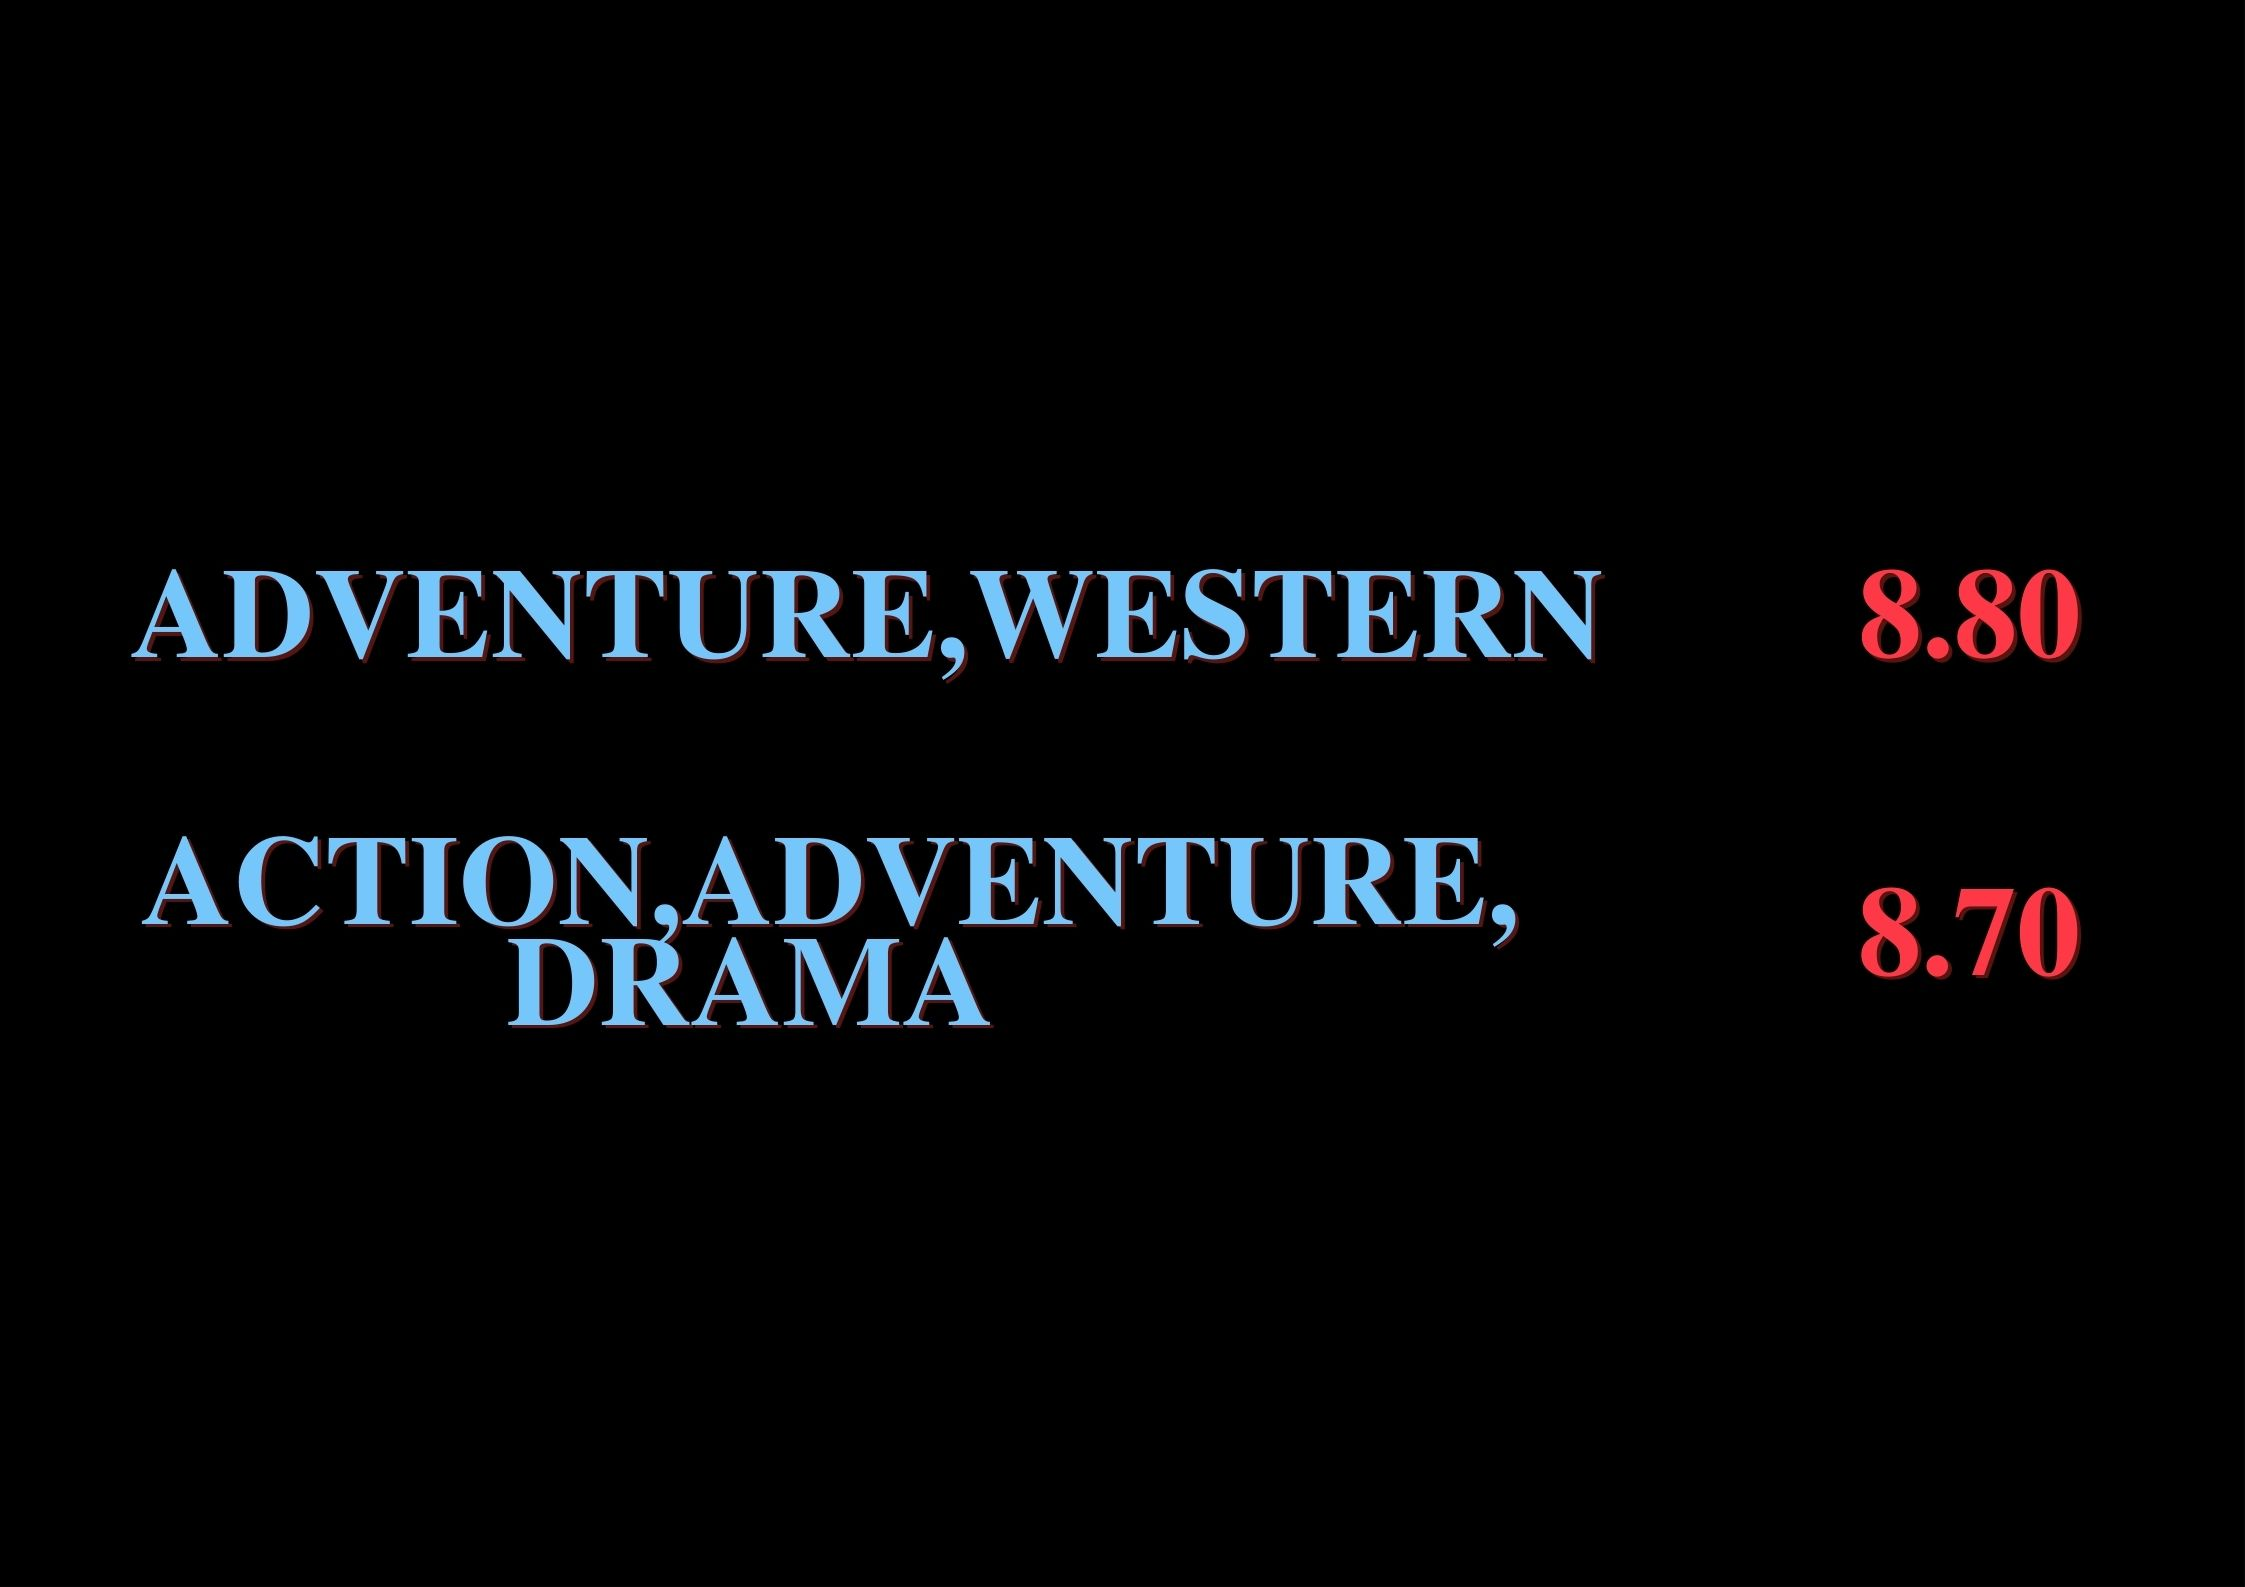

#### 4.	Which certificate is most common in the dataset?

We can use the value_counts() function to count the number of occurrences of each certificate in the dataset and then display the certificate with the highest count.

In [24]:
cert_counts = imdb_df['certificate'].value_counts()
print(cert_counts.head(1))

R    98
Name: certificate, dtype: int64


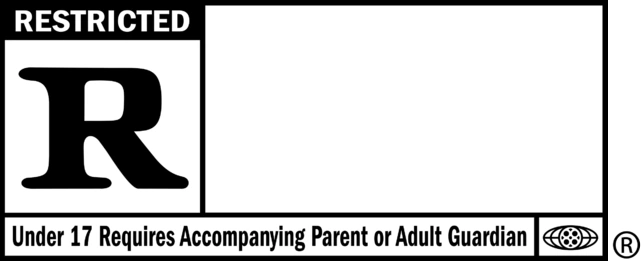

#### 5.	Who is the director with the most movies in the dataset?

We can group the dataset by the "directors" column and count the number of occurrences of each director using the value_counts() method. Then, we can display the first row of the resulting series to get the director with the most movies.

In [25]:
director_counts = imdb_df['directors'].value_counts()
most_movies_director = director_counts.index[0]
print("The director with the most movies in the dataset is:", most_movies_director)

The director with the most movies in the dataset is: Martin Scorsese


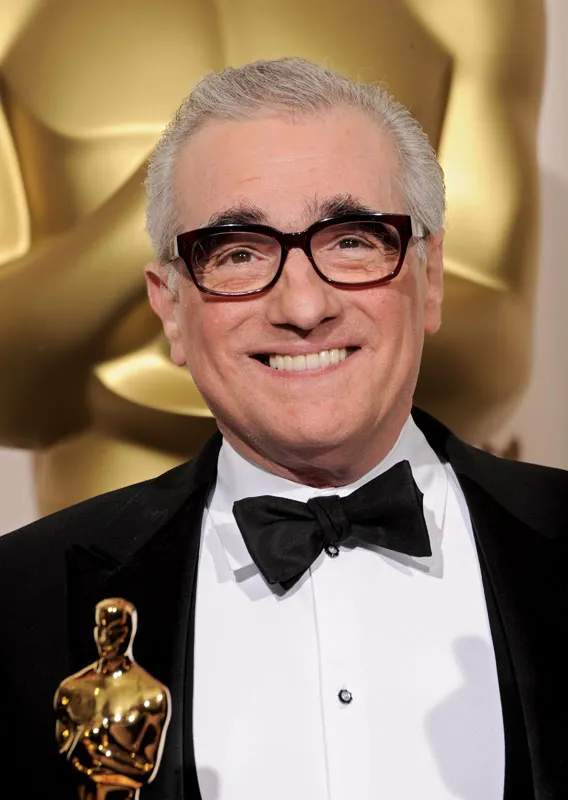

#### 6. What is the tagline of highest rated movie?

We can get the desired outcome by sorting the dataframe by the "rating" column in descending order. Then select the first row of the sorted dataframe using the "iloc" method. Lastly, retrieve the value in the "tagline" column for the selected row.

In [26]:
highest_rating = imdb_df['rating'].max()
highest_rated_movie = imdb_df.loc[imdb_df['rating'] == highest_rating]
tagline = highest_rated_movie['tagline'].values[0]
print(tagline)


Fear can hold you prisoner. Hope can set you free.


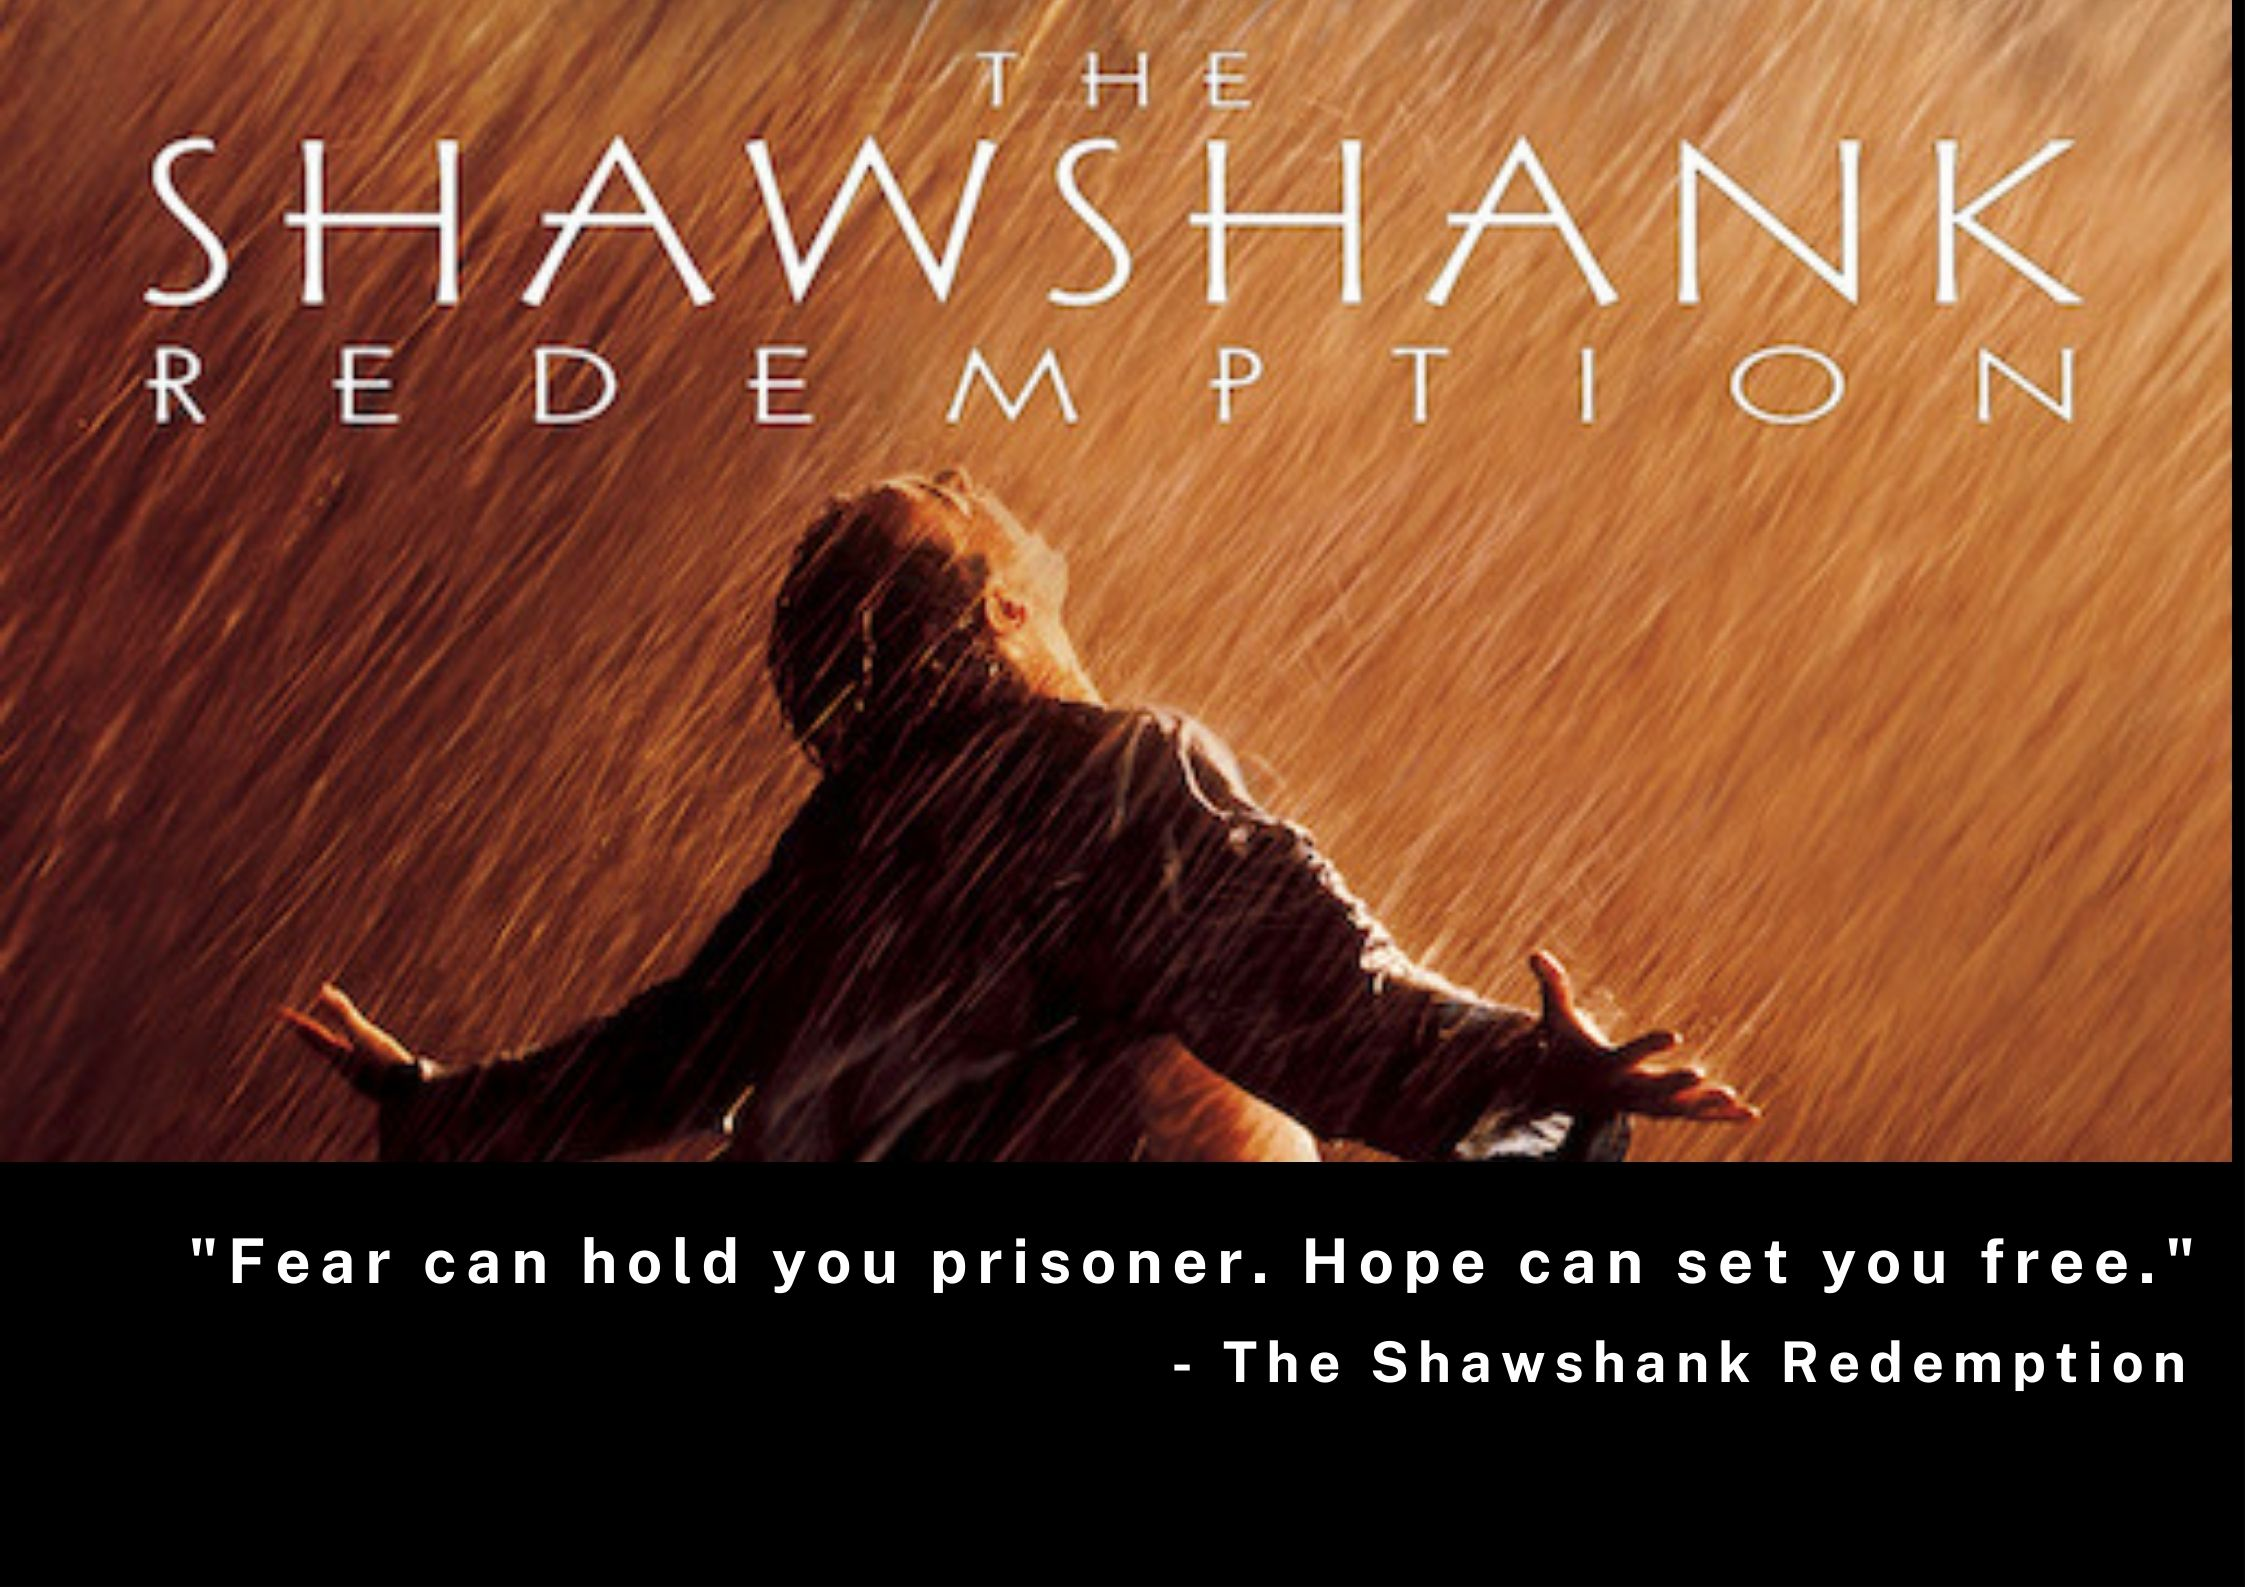

#### 7.	Which movie had the highest budget?

We can use the imdb_df dataframe and sort it by the budget column in descending order and then select the first row using the .iloc accessor.

In [27]:
highest_budget_movie = imdb_df.sort_values('budget', ascending=False).iloc[0]
print("The movie with the highest budget in the dataset is:", highest_budget_movie['name'])

The movie with the highest budget in the dataset is: Avengers: Endgame


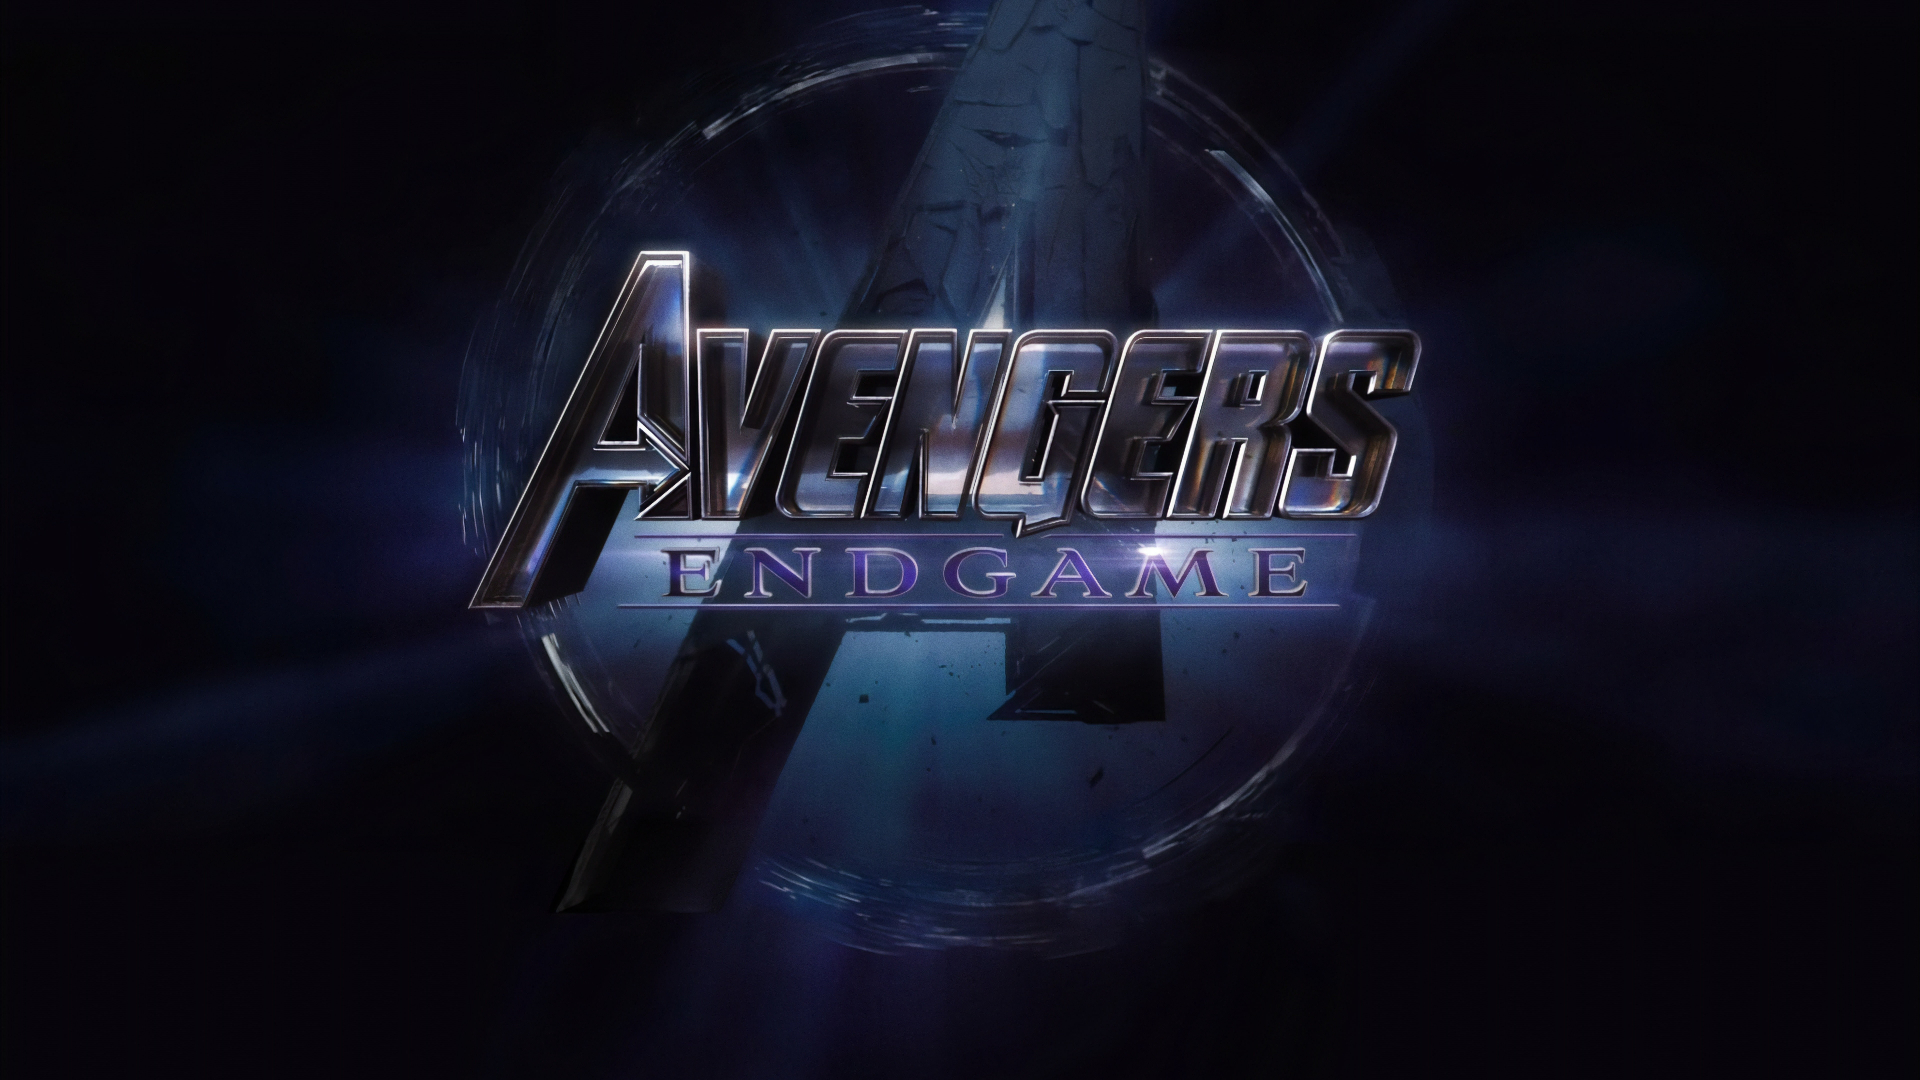

#### 8.	Which movie had the highest box office collection?

We can sort the dataframe by the "box_office" column in descending order and select the top row.

In [28]:
highest_grossing_movie = imdb_df.sort_values(by='box_office', ascending=False).iloc[0]
print(highest_grossing_movie['name'])

Avengers: Endgame


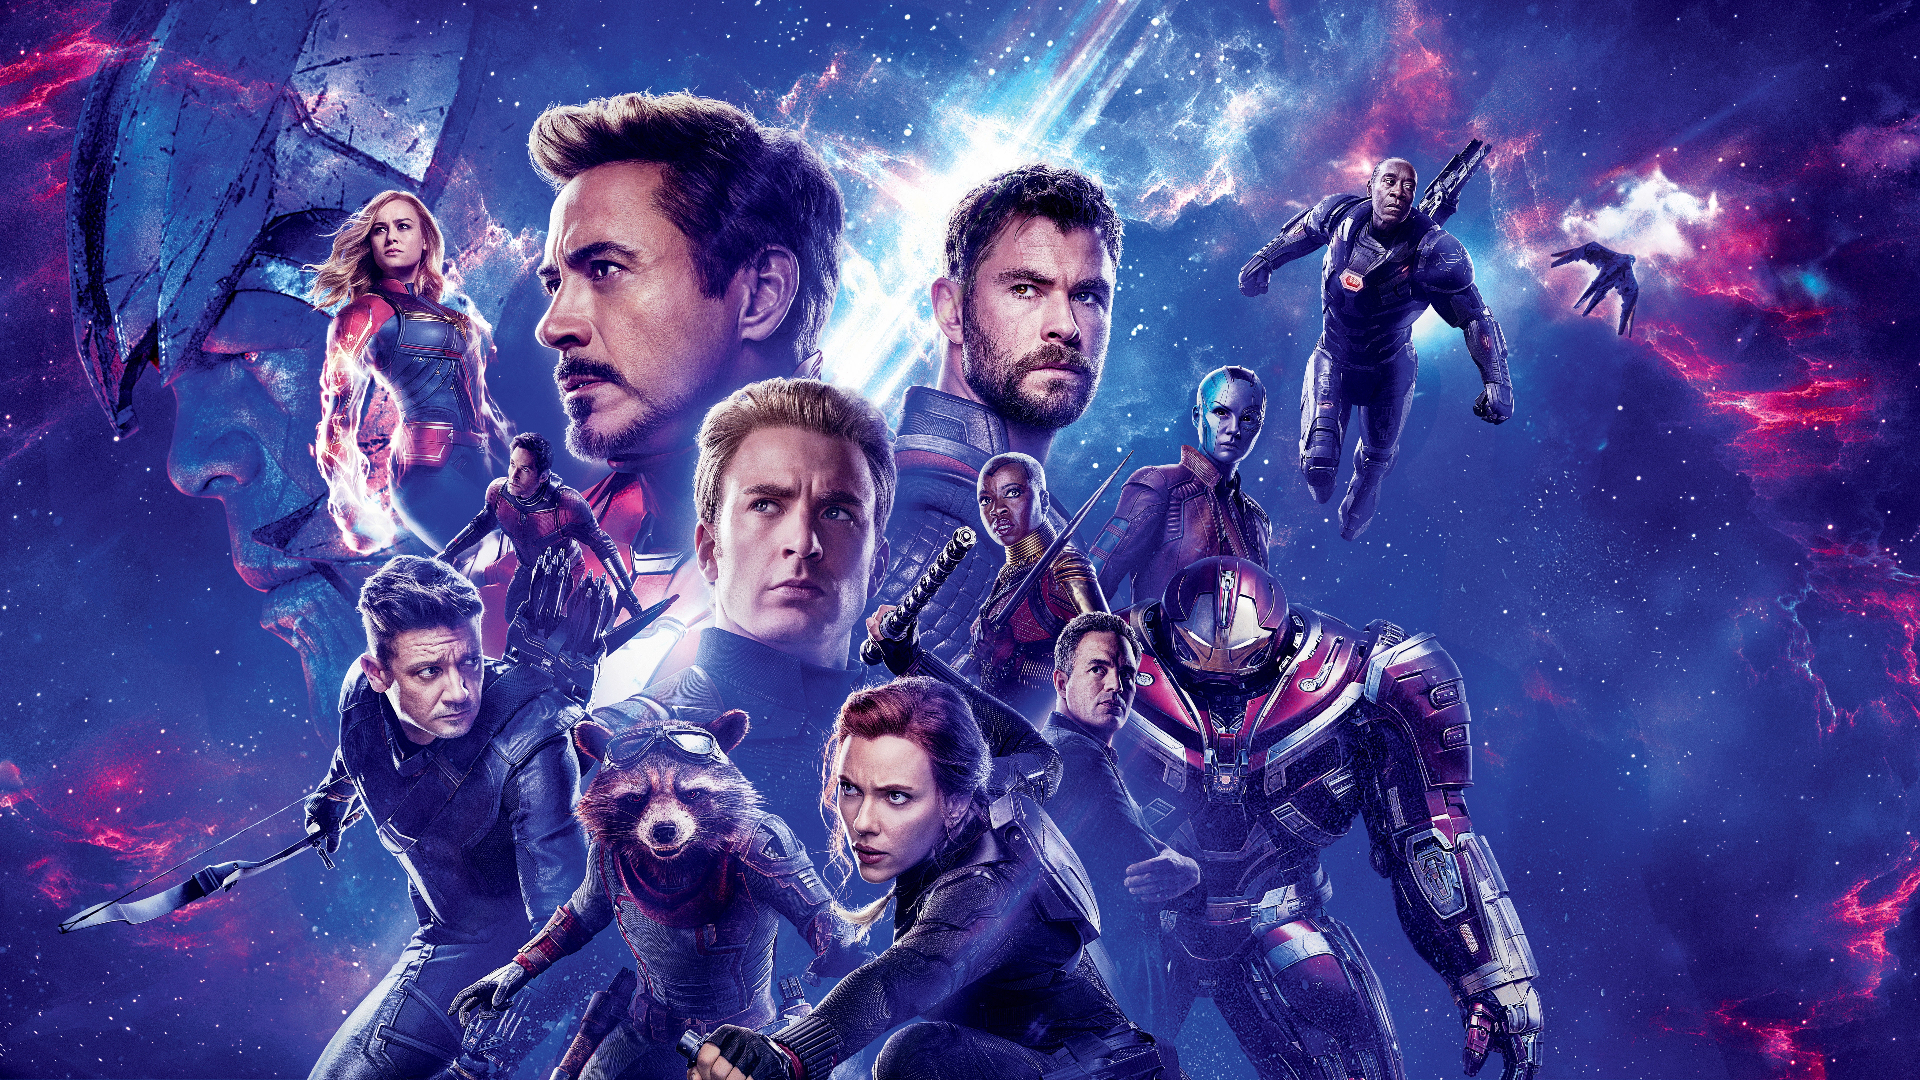

#### 9.	Which actor appeared in the most movies in the dataset?

We need to count the occurrences of each actor in the casts column of the imdb_df DataFrame. We can do this using the .value_counts() method of pandas.

In [29]:
# Split the "casts" column into multiple columns
casts_df = imdb_df['casts'].str.split(',', expand=True)

# Create a new dataframe with the counts of each actor
actor_counts = casts_df.stack().value_counts()

# Get the name of the actor with the highest count
top_actor = actor_counts.index[0]

print("The actor who appeared in the most movies in the dataset is:", top_actor)


The actor who appeared in the most movies in the dataset is: Robert De Niro


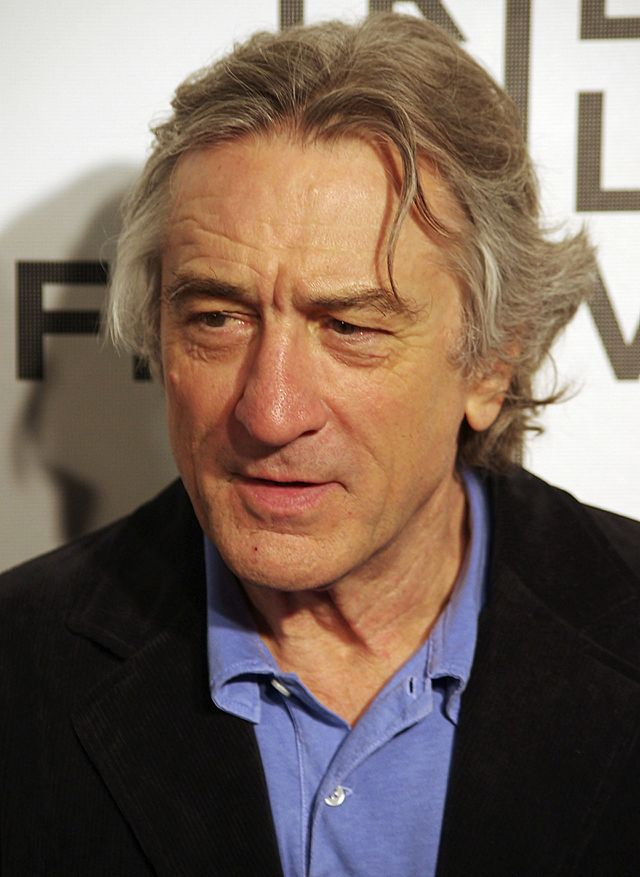

#### 10. Which writer worked on the most movies in the dataset?

We can use Pandas' value_counts() method to count the occurrences of each writer in the writers column, and then sort the values in descending order.

In [30]:
top_writer = imdb_df['writers'].str.split(',', expand=True).stack().value_counts().index[0]
print("The writer who worked on the most movies in the dataset is:", top_writer)

The writer who worked on the most movies in the dataset is: Stanley Kubrick


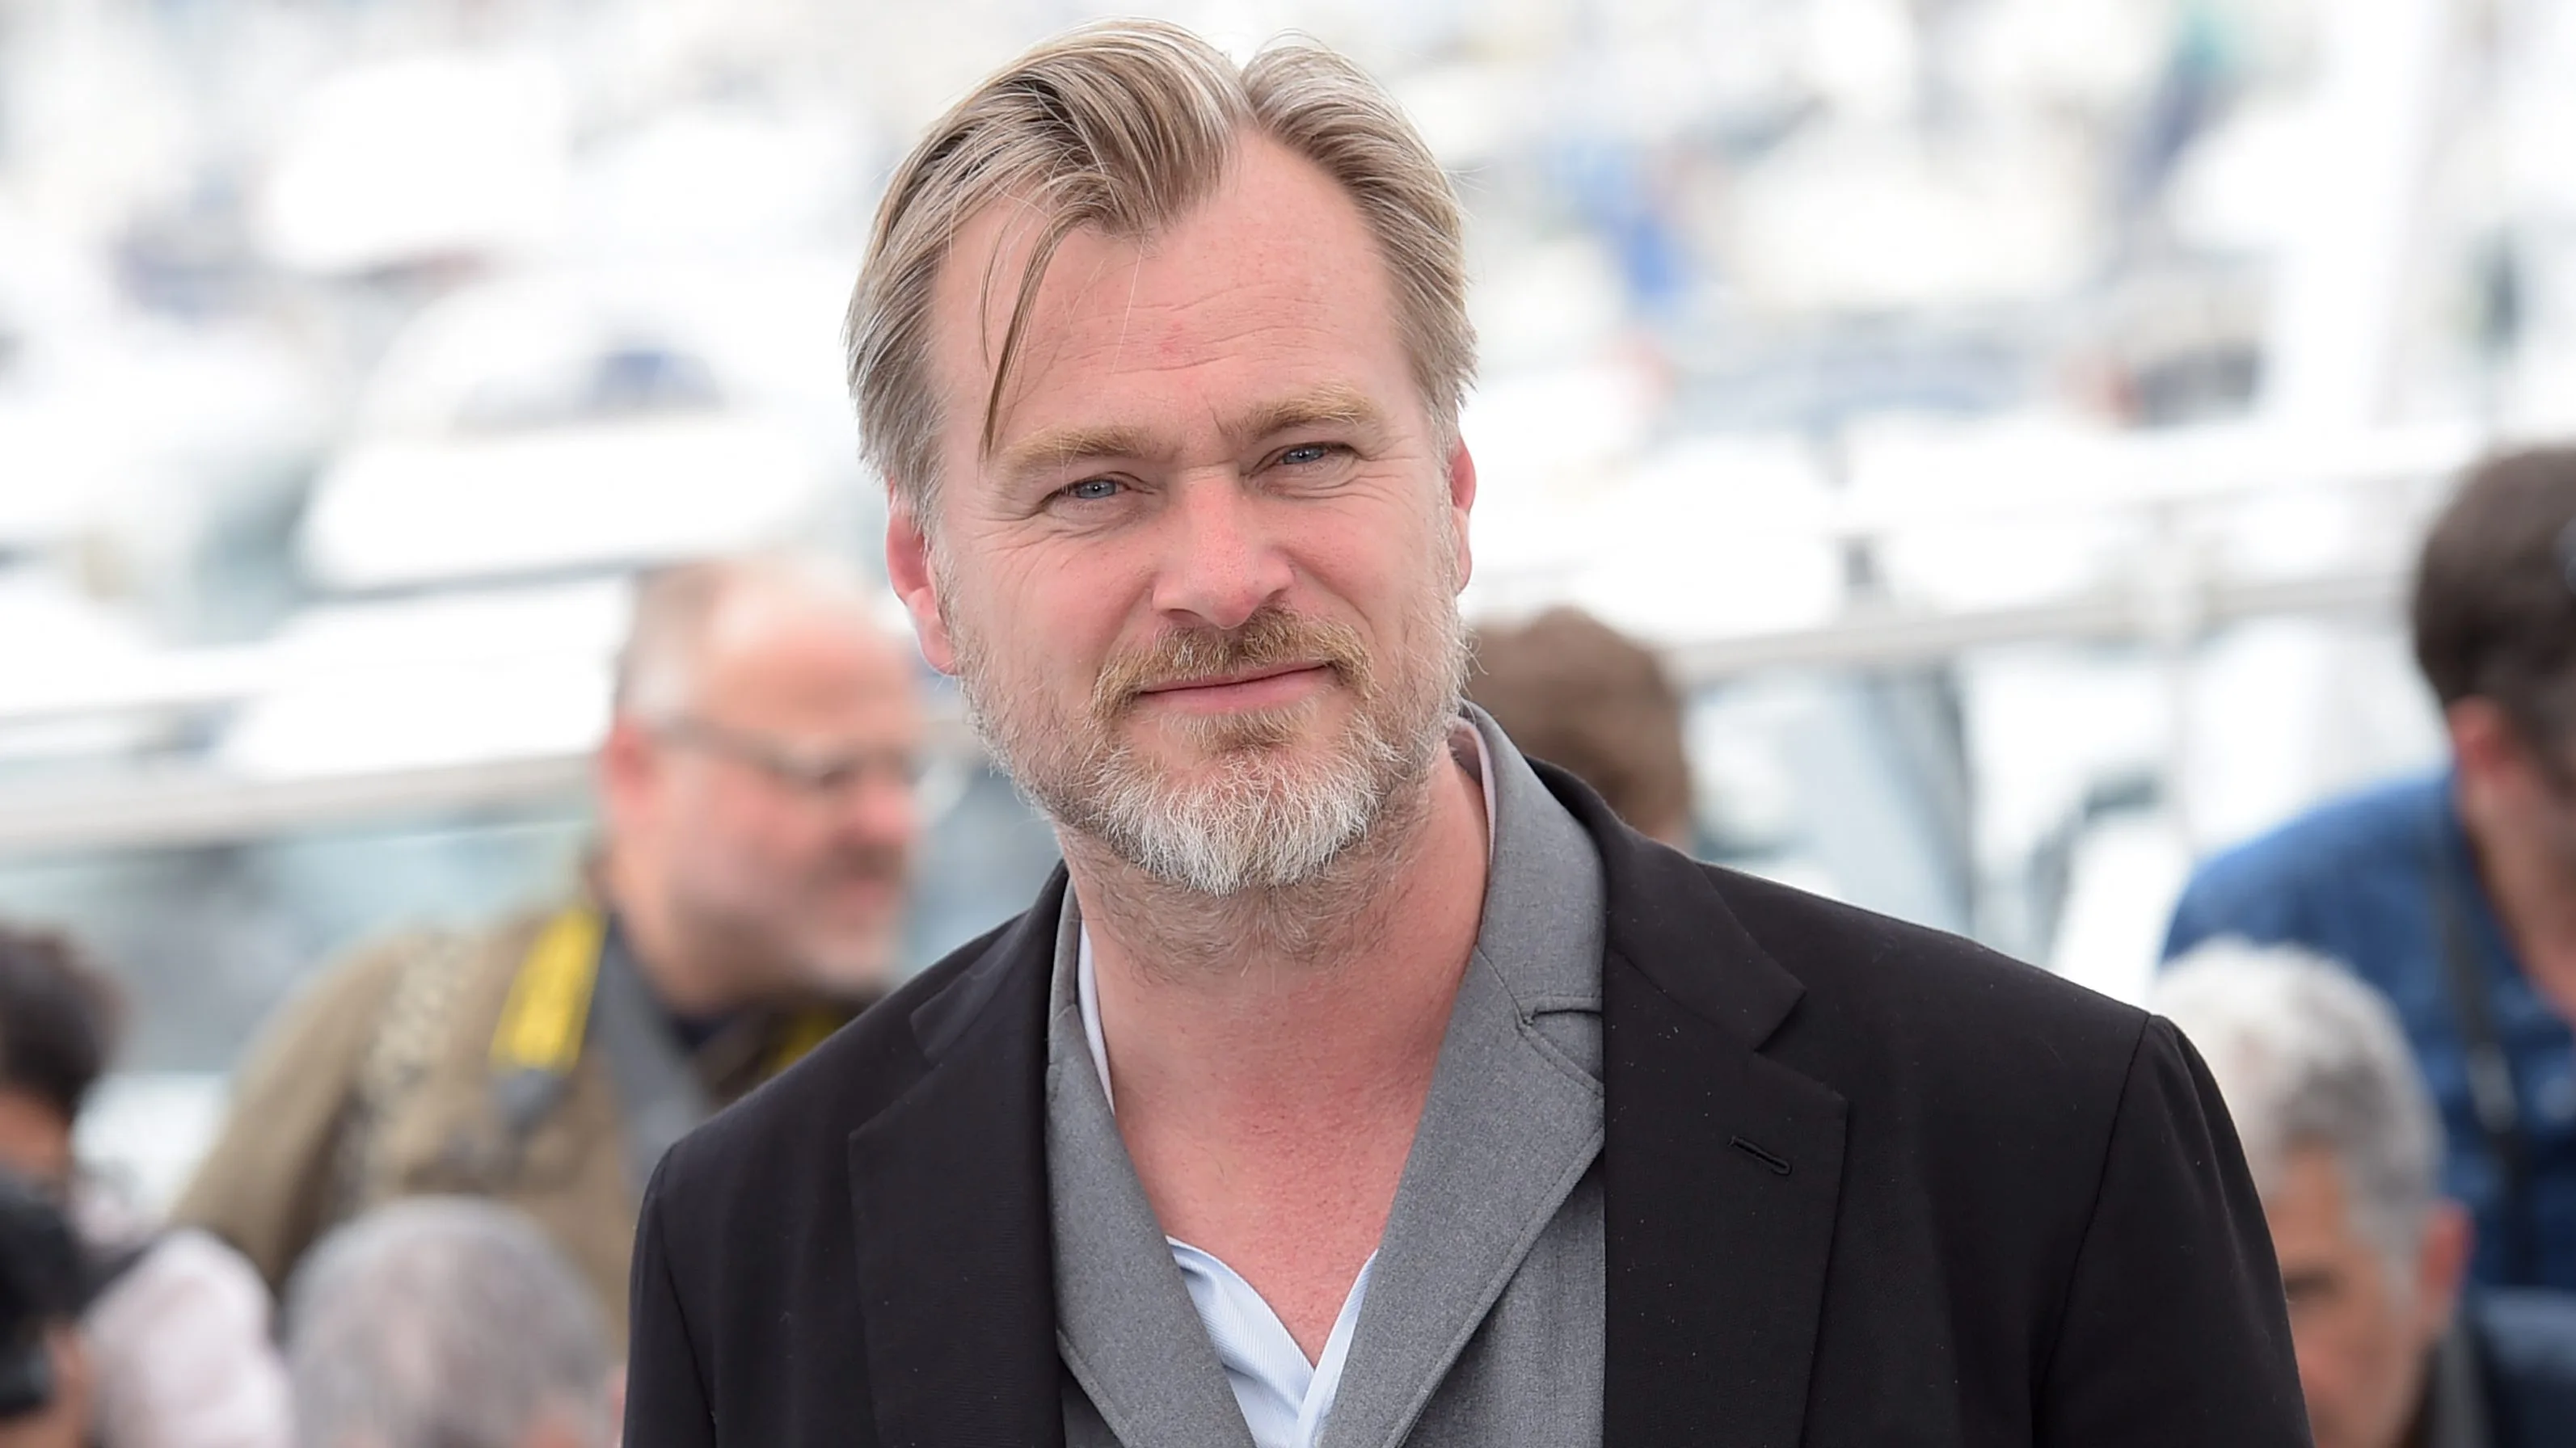

#### 11.	Is there a correlation between a movie's budget and its box office collection?

To explore the correlation between a movie's budget and its box office collection, we can use a scatter plot with budget on the x-axis and box office collection on the y-axis. We can then add a regression line to see if there is a correlation between the two variables.

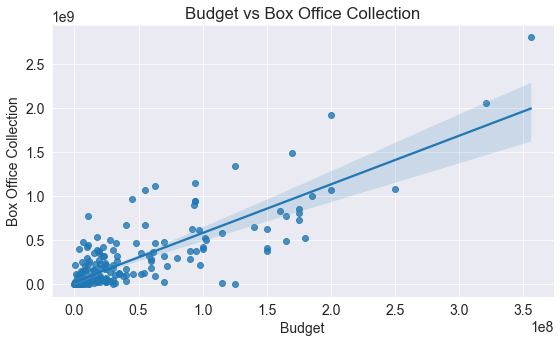

In [31]:
#Filter out rows with 0 budget
imdb_df = imdb_df[imdb_df['budget'] != 0]

#Create scatter plot with regression line
sns.regplot(x='budget', y='box_office', data=imdb_df)
plt.xlabel('Budget')
plt.ylabel('Box Office Collection')
plt.title('Budget vs Box Office Collection')
plt.show()

In [32]:
correlation = imdb_df['budget'].corr(imdb_df['box_office'])
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.8275847678081822


A correlation coefficient of 0.8275847678081822 indicates a strong positive correlation between two variables. In this case, it implies that there is a strong positive correlation between the budget and box office collection of the movies in the dataset. This suggests that movies with higher budgets tend to have higher box office collections. It is important to note that correlation does not imply causation, so further analysis would be required to determine if there is a causal relationship between the two variables. Nonetheless, this correlation coefficient provides valuable insight into the relationship between these two variables in the dataset.

##  Ask & answer questions about the data

In this phase I will try to answer as much question that might come up from the data as possible. To answer I will use matplotlib and seaborn as visualization and pandas as well as numpy for calculation.

#### 1.	What is the distribution of ratings across all movies in the dataset?

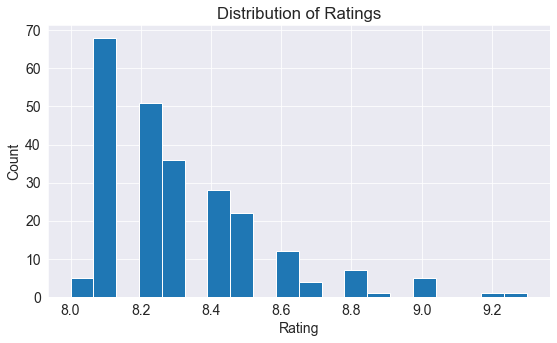

In [33]:
# Create histogram of ratings
plt.hist(imdb_df['rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

plt.show()


The resulting graph shows the distribution of ratings across all movies in the dataset. The x-axis represents the rating values, while the y-axis represents the count of movies with that rating.
From the histogram, we can see that the majority of movies have a rating between 8.0 and 9, with a peak around 8.1. There are fewer movies with ratings above 8.5 and 9. This indicates that the movies in the dataset are generally well-received by audiences, with most falling within the range of slightly good to very good.

#### 2.	Which year had the most movies in the top 250 list? (Only include top 5 years)

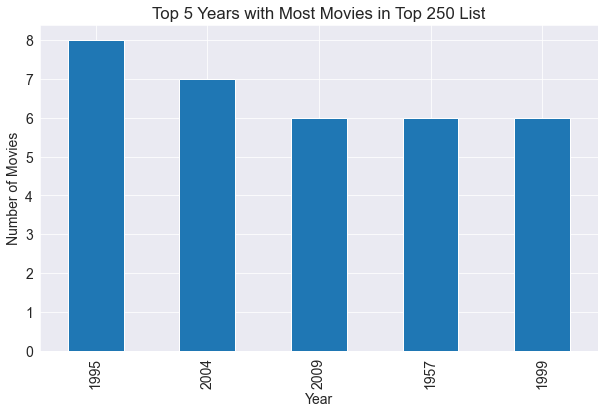

In [34]:
# Group the data by year and count the number of movies in the top 250 list for each year
movies_by_year = imdb_df[imdb_df['rank'] <= 250].groupby('year').count()['rank']

# Sort the data in descending order and take the top 5 years
top_5_years = movies_by_year.sort_values(ascending=False)[:5]

# Create a bar chart to visualize the data
ax = top_5_years.plot(kind='bar', figsize=(10, 6))

# Set the title and axis labels
ax.set_title('Top 5 Years with Most Movies in Top 250 List')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')


# Show the plot
plt.show()


The given data represents the top movies released in different years, with the count of how many movies were able to make it to the list. The year 1995 had the most number of top movies with 8 films making it to the list, followed by 2004 and 1957 with 7 and 6 films respectively.

#### 3.	Which certificate type (R, PG, etc.) is most common among the movies in the top 250 list?

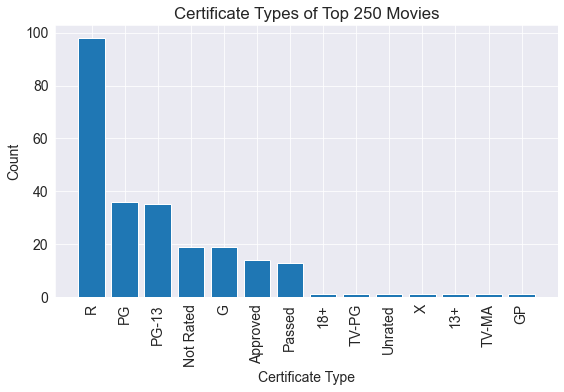

In [35]:
# count the number of movies for each certificate type
certificate_counts = imdb_df['certificate'].value_counts()

# plot the bar chart
plt.bar(certificate_counts.index, certificate_counts.values)

# add titles and labels
plt.title('Certificate Types of Top 250 Movies')
plt.xlabel('Certificate Type')
plt.ylabel('Count')

# rotate the xtick labels by 90 degrees
plt.xticks(rotation=90)

# show the plot
plt.show()



From the above visual, we can see the distribution of certificate ratings of movies in the IMDb top 250 list. The most common certificate rating is R, followed by PG and PG-13. Not Rated, G, Passed, and Approved are the next most common ratings. Other ratings like 18+, X, 13+, TV-PG, TV-MA, and GP have a relatively low frequency. This suggests that most of the movies in the top 250 list are targeted towards mature audiences, as indicated by the prevalence of R and PG-13 ratings.

#### 4. Who are the top 10 most frequent directors in the top 250 list?

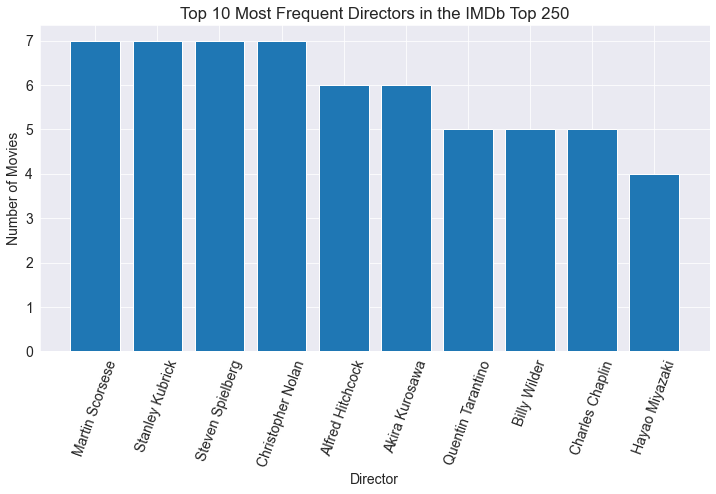

In [36]:
# Group the data by 'directors' and count the number of occurrences for each director
directors_count = imdb_df.groupby('directors').size().reset_index(name='count')

# Sort the result in descending order and take the top 10
top_directors = directors_count.sort_values(by='count', ascending=False).head(10)

# Create a bar chart of the top 10 directors
plt.figure(figsize=(12, 6))
plt.bar(top_directors['directors'], top_directors['count'])
plt.title('Top 10 Most Frequent Directors in the IMDb Top 250')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=70)

plt.show()


From the above visual we can draw conclusion of question 4 is that-

•	Christopher Nolan, Akira Kurosawa, Stanley Kubrick, Steven Spielberg, Martin Scorsese are all tied for the top spot with 7 movies each in the IMDb top 250 list.

•	Alfred Hitchcock has 6 movies in the top 250, which is the highest among directors with fewer than 7 movies in the list.

•	Quentin Tarantino has 5 movies in the top 250, which is the highest among directors who started their careers in the 1990s or later.

•	Charles Chaplin and Billy Wilder are the only directors in the list who were active primarily in the first half of the 20th century.

•	Hayao Miyazaki, a Japanese animator and filmmaker, has 4 movies in the top 250, which is the highest among non-English language directors.


#### 5.Which top 10 movies have the longest run time?

We need to convert the 'run_time' column into a numerical data type before using the 'nlargest' method.

We can convert the 'run_time' column into minutes by extracting the hour and minute components, multiplying the hour component by 60 and adding the minute component. Then we can convert the resulting values into numerical data type using the 'astype' method.

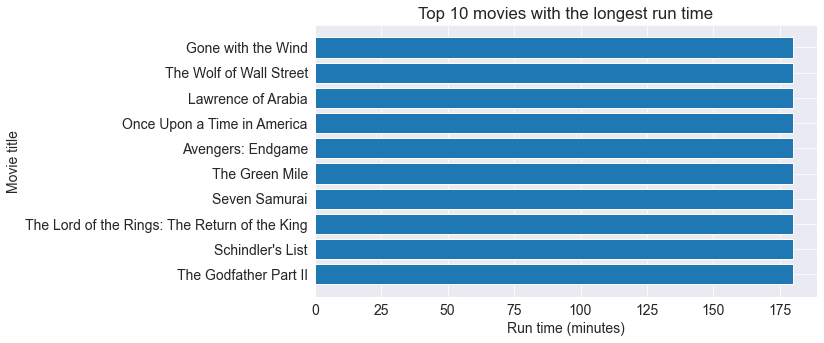

In [37]:
# Extract the hour and minute components from the 'run_time' column
hours = imdb_df['run_time'].str.extract('(\d+)h', expand=False).fillna(0).astype(int)
minutes = imdb_df['run_time'].str.extract('(\d+)min', expand=False).fillna(0).astype(int)

# Convert the run time to minutes and add as a new column
imdb_df['run_time_min'] = hours * 60 + minutes

# Find the top 10 movies with the longest run time
top10_run_time = imdb_df.nlargest(10, 'run_time_min')[['name', 'run_time_min']]

# Plot the results
plt.barh(top10_run_time['name'], top10_run_time['run_time_min'])
plt.xlabel('Run time (minutes)')
plt.ylabel('Movie title')
plt.title('Top 10 movies with the longest run time')
plt.show()



The top movies with the longest run time have a duration of 180 minutes. This duration seems to be a popular choice among filmmakers for movies that have complex storylines and require sufficient time for character development. The presence of both classic movies like "Gone with the Wind" and modern movies like "The Wolf of Wall Street" in the list suggests that the trend of longer movies has persisted over the years. Additionally, it can be inferred that audiences are willing to invest their time in movies that offer a rich and immersive experience.

#### 6. Which certificate type is most commonly associated with a particular genre?

We can use a pivot table to calculate the count of each certificate type for each genre. Then, we can create a heatmap to visualize the results.

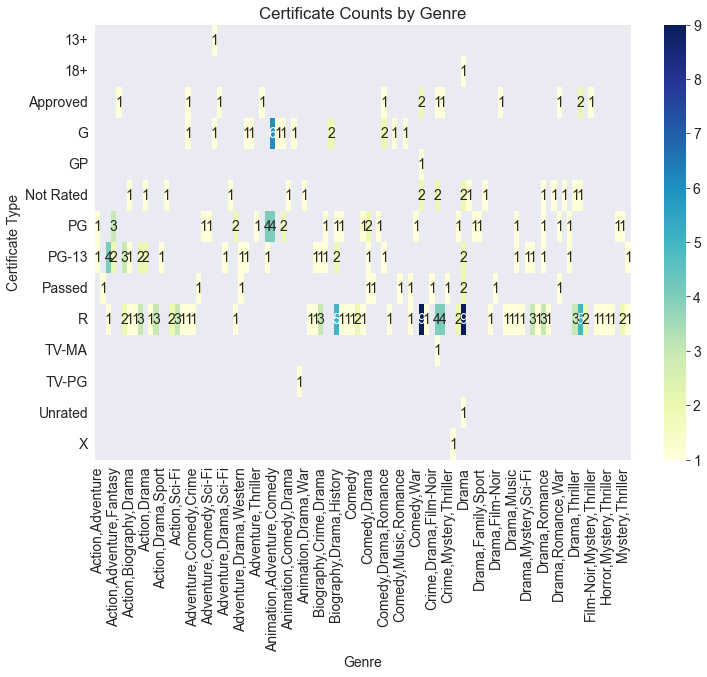

In [38]:
# create a pivot table of certificate counts by genre
cert_genre = imdb_df.pivot_table(index='certificate', columns='genre', values='name', aggfunc='count')

# create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cert_genre, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Certificate Counts by Genre')
plt.xlabel('Genre')
plt.ylabel('Certificate Type')

plt.show()


From the above certificate ratings, we can see that PG-13 is the most common certificate rating for the genre of Action, Adventure, and Sci-Fi movies, having a count of 4. It is followed by R-rated movies, which have a count of 3 for the genre of Action, Crime, Drama movies. Among the certificate ratings, G-rated movies only have one occurrence, while the certificate rating of Passed has two occurrences for the genres of Action, Adventure, and Comedy movies and Western movies. We can also see that for a few genres, the certificate rating is not applicable, as the count for these genres is missing.

#### 7.	Which genre is most commonly associated with a particular top director?

We can answer this question by creating a pivot table that shows the count of movies for each combination of director and genre. Then, we can find the most common genre associated with each director.

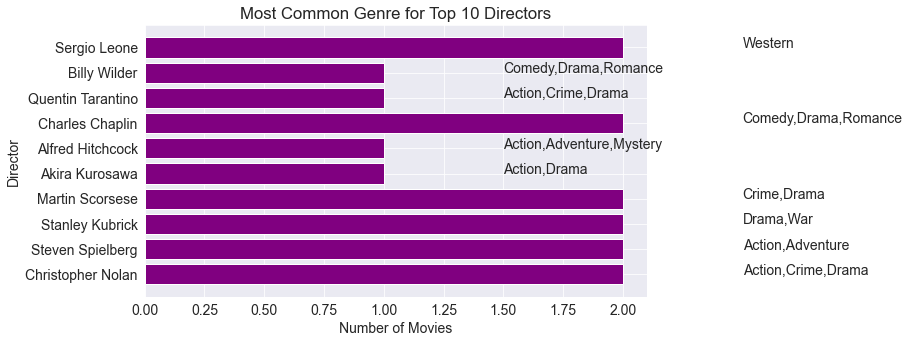

In [39]:
# create a pivot table of counts of movies for each combination of director and genre
director_genre_counts = imdb_df.pivot_table(index='directors', columns='genre', values='name', aggfunc='count', fill_value=0)

# get the top 10 directors by total movie count
top_directors = imdb_df['directors'].value_counts().nlargest(10).index.tolist()

# plot a horizontal bar chart for each director showing their most common genre
for directors in top_directors:
    director_genre = director_genre_counts.loc[directors]
    most_common_genre = director_genre.nlargest(1)
    plt.barh(directors, most_common_genre[0], color='purple')
    plt.text(most_common_genre[0]+0.5, top_directors.index(directors), most_common_genre.index.tolist()[0])

# set axis labels and a title
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Most Common Genre for Top 10 Directors')

# show the plot
plt.show()


It can be observed that some of the most highly acclaimed and influential directors have worked on a variety of genres. For instance, Martin Scorsese has directed two films belonging to the crime and drama genres, while Christopher Nolan has directed films that fall under the action, crime, and drama genres.

It is also interesting to note that some of the directors, such as Akira Kurosawa and Stanley Kubrick, have directed films that belong to multiple genres, indicating a versatility in their approach to filmmaking.

Furthermore, it is notable that several of the directors on the list have directed films that fall under the action and adventure genres, such as Steven Spielberg and Hayao Miyazaki, indicating a wide appeal of these genres across different cultures and audiences.

Overall, the data suggests that successful and highly acclaimed directors are not limited to a single genre, and that versatility and a willingness to experiment with different genres may contribute to a director's success.

for the forthcoming questions We will target a 2016 korean thriller film named "The Handmaiden", with the details-

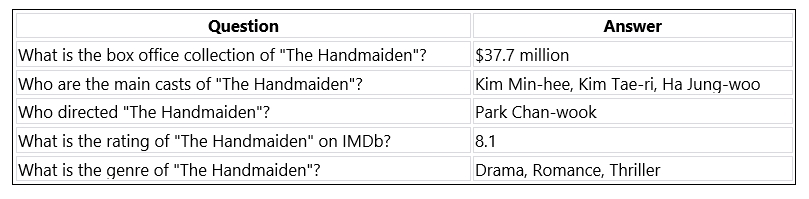


#### 8. How does the budget of "The Handmaiden" compare to other movies in the same genre?

To compare the budget of "The Handmaiden" with other movies in the same genre, we can create a boxplot of the budget for each movie in the same genre as "The Handmaiden". We can start by extracting the genre of "The Handmaiden" and then filtering the dataset to only include movies with that same genre. We can then create a boxplot to visualize the budget distribution of these movies.

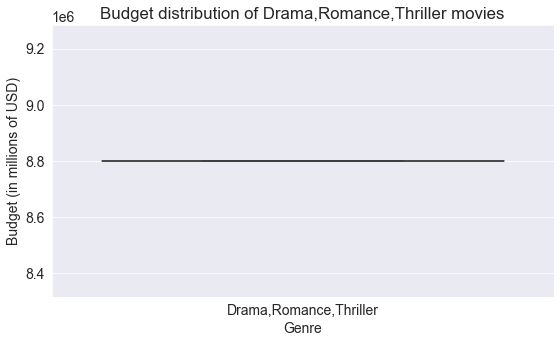

In [40]:
# extract the genre of "The Handmaiden"
handmaiden_genre = imdb_df.loc[imdb_df['name'] == 'The Handmaiden', 'genre'].values[0]

# filter the dataset to only include movies with the same genre as "The Handmaiden"
same_genre_df = imdb_df.loc[imdb_df['genre'] == handmaiden_genre]

sns.boxplot(x=same_genre_df['genre'], y=same_genre_df['budget'], showfliers=False)

plt.title(f'Budget distribution of {handmaiden_genre} movies')
plt.xlabel('Genre')
plt.ylabel('Budget (in millions of USD)')

plt.show()


#### 9. Are there any trends in the genre of movies that "The Handmaiden" director, Park Chan-wook, has directed in the past?

We can create a bar plot showing the frequency of each genre that Park Chan-wook has directed in the past. We will use the imdb_df DataFrame and filter for all movies directed by Park Chan-wook using the directors column. Then, we will count the frequency of each genre using the value_counts() method and create a bar plot.

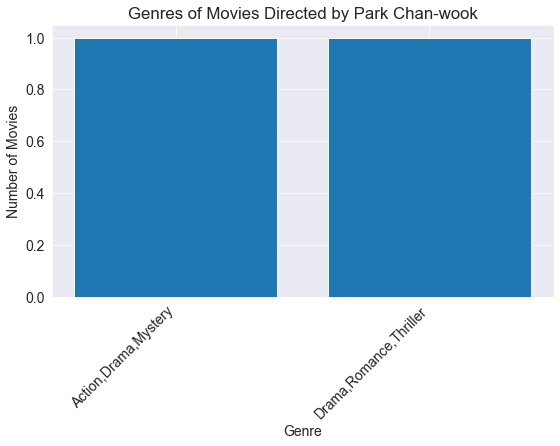

In [41]:
# filter for all movies directed by Park Chan-wook
pcw_movies = imdb_df[imdb_df['directors'] == 'Park Chan-wook']

# count the frequency of each genre
genre_counts = pcw_movies['genre'].value_counts()

# create the bar plot
plt.bar(x=genre_counts.index, height=genre_counts.values)

# add axis labels and a title
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Genres of Movies Directed by Park Chan-wook')

# rotate xticks for better visibility
plt.xticks(rotation=45, ha='right')

# show the plot
plt.show()

Park Chan-wook has directed two movies with different genres. One is categorized as Action, Drama, and Mystery while the other falls under Drama, Romance, and Thriller.

This insight highlights Park Chan-wook's ability to direct movies across various genres, showcasing his versatility as a filmmaker. It also suggests that Park Chan-wook may not be tied to a particular genre and is willing to experiment with different genres in his movies, which could make his work appealing to a wider range of audiences.

#### 10. Is there a correlation between the number of writers of a movie and the movie's rating for movies in the same genre as "The Handmaiden"?

Get a subset of the dataframe for movies in the same genre as "The Handmaiden".
Create a new column for the number of writers of each movie.
Create a scatter plot to visualize the relationship between the number of writers and the movie rating.
Calculate the correlation coefficient between the number of writers and the movie rating.

Correlation coefficient: nan


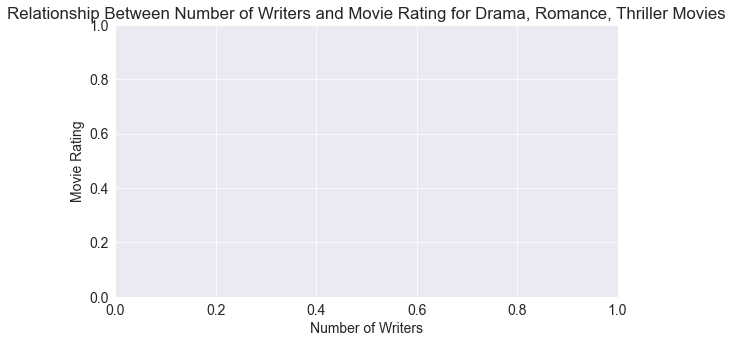

In [42]:
# Step 1: Get a subset of the dataframe for movies in the same genre as "The Handmaiden"
handmaiden_genre = imdb_df[imdb_df['genre'] == 'Drama, Romance, Thriller']

# Step 2: Create a new column for the number of writers of each movie
handmaiden_genre['num_writers'] = handmaiden_genre['writers'].apply(lambda x: len(x.split(', ')))

# Step 3: Create a scatter plot to visualize the relationship between the number of writers and the movie rating
sns.scatterplot(x='num_writers', y='rating', data=handmaiden_genre)
plt.xlabel('Number of Writers')
plt.ylabel('Movie Rating')
plt.title('Relationship Between Number of Writers and Movie Rating for Drama, Romance, Thriller Movies')

# Step 4: Calculate the correlation coefficient between the number of writers and the movie rating
corr_coef = handmaiden_genre['num_writers'].corr(handmaiden_genre['rating'])
print(f"Correlation coefficient: {corr_coef:.2f}")


The correlation coefficient being "nan" (not a number) suggests that there is not enough data or variability in the data to calculate a meaningful correlation between the number of writers and the movie's rating. This may be due to a lack of movies in the same genre as "The Handmaiden" with varying numbers of writers, or it could indicate that there is no relationship between the number of writers and a movie's rating in this genre. Therefore, further analysis or data collection may be necessary to determine if there is a correlation between the number of writers and a movie's rating in this genre.

#### 11. Is there a significant difference in the average rating of movies released in the last decade compared to the previous decade?

We need to group the movies by decade and calculate the average rating of each decade. We can then plot a line graph to compare the average ratings of the two decades.

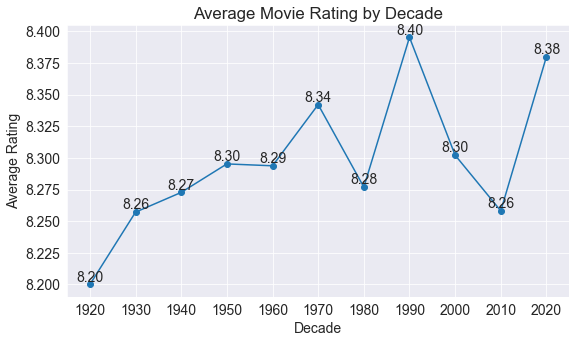

In [43]:

# Convert year to datetime and extract decade
imdb_df["year"] = pd.to_datetime(imdb_df["year"], format="%Y")
imdb_df["decade"] = imdb_df["year"].dt.year // 10 * 10

# Group by decade and calculate average rating
decade_avg_rating = imdb_df.groupby("decade")["rating"].mean()

# Plot the line graph
plt.plot(decade_avg_rating.index, decade_avg_rating.values, marker="o")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.title("Average Movie Rating by Decade")
plt.xticks(decade_avg_rating.index)

# Add details to the dots
for x, y in zip(decade_avg_rating.index, decade_avg_rating.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
    
plt.show()


The average rating of movies for each decade from 1920 to 2020. It appears that there is a fluctuation in the average rating over the years, with the highest average rating being in the 1970s and 1990s, and the lowest being in the 1920s and 1930s. However, there does not seem to be a significant difference in the average rating between the last decade (2010s) and the previous decade (2000s), as both have an average rating of around 8.3. It is important to note that this analysis only considers the average rating and does not take into account other factors that may affect the quality or popularity of movies released in each decade.

## Summary and Conclusive insights

The analysis of the IMDb Top 250 dataset revealed several interesting findings. The majority of movies in the dataset have a rating between 8.0 and 9.0, with most falling within the range of slightly good to very good. The year 1995 had the most number of top movies with 8 films making it to the list, followed by 2004 and 1957. The most common certificate rating is R, followed by PG and PG-13. Christopher Nolan, Akira Kurosawa, Stanley Kubrick, Steven Spielberg, and Martin Scorsese are all tied for the top spot with 7 movies each in the IMDb top 250 list. The longest duration for top-rated movies is 180 minutes, and PG-13 is the most common certificate rating for the genre of Action, Adventure, and Sci-Fi movies.

#### Crucial Insights of the analysis

1.	The majority of movies in the dataset have a rating between 8.0 and 9, indicating that they are generally well-received by audiences.

2.	The year 1995 had the most number of top movies in the list, followed by 2004 and 1957.

3.	R and PG-13 are the most common certificate ratings in the top 250 list, suggesting that most of the movies are targeted towards mature audiences.

4.	Christopher Nolan, Akira Kurosawa, Stanley Kubrick, Steven Spielberg, and Martin Scorsese have the most movies in the top 250 list, while Hayao Miyazaki has the highest among non-English language directors.

5.	Longer movies with a duration of 180 minutes are popular among filmmakers, with both classic and modern movies in the list, suggesting that audiences are willing to invest their time in movies that offer a rich and immersive experience.

6.	PG-13 is the most common certificate rating for the genre of Action, Adventure, and Sci-Fi movies, while R-rated movies are common for the genre of Action, Crime, and Drama movies.

7.	Successful and highly acclaimed directors are not limited to a single genre, and versatility and a willingness to experiment with different genres may contribute to a director's success.

8.	There is a fluctuation in the average rating of movies over the years, with the highest being in the 1970s and 1990s and the lowest being in the 1920s and 1930s, but there is no significant difference 
between the average rating of the last decade and the previous decade.




## References and Future Work

#### References:

1. Initial dataset courtesy goes to "Chidambara Raju G" on kaggle and the dataset [IMDB Top 250 Movies Dataset](https://www.kaggle.com/datasets/rajugc/imdb-top-250-movies-dataset)  

2. Pandas documentation - https://pandas.pydata.org/pandas-docs/stable/

3. Numpy documentation - https://numpy.org/doc/stable/

4. Matplotlib documentation - https://matplotlib.org/stable/contents.html

5. Seaborn documentation - https://seaborn.pydata.org/

6. online resources such as the IMDb website - https://www.imdb.com/chart/top/

#### Future work 
On this topic could involve analyzing other datasets that contain information on movie revenues, production budgets, and social media buzz. This would allow for a more comprehensive analysis of the factors that contribute to a movie's success. Additionally, examining the distribution of ratings across different age groups could provide insight into the preferences of different demographics.